In [1]:
%pip install --upgrade pip
%pip install davos
import davos

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
smuggle pandas as pd # pip: pandas==1.5.1
smuggle numpy as np # pip: numpy==1.23.4
smuggle seaborn as sns # pip: seaborn==0.12.1
smuggle dill as pickle # pip: dill==0.3.6

smuggle h5py # pip: h5py==3.7.0
smuggle pathos # pip: pathos==0.3.0
smuggle quail # pip: quail==0.2.1
smuggle requests # pip: requests==2.28.1
smuggle os
smuggle warnings
smuggle string

from tqdm smuggle tqdm # pip: tqdm==4.64.1
from matplotlib smuggle pyplot as plt #pip: matplotlib==3.6.2
from matplotlib.ticker smuggle MaxNLocator
from pathos.multiprocessing smuggle ProcessingPool as Pool # pip: pathos==0.3.0
from multiprocessing smuggle cpu_count  # pip: multiprocess==0.70.14
from sklearn.decomposition smuggle IncrementalPCA as PCA # pip: scikit-learn==1.1.3

# local functions
from dataloader import datadir, grouping, feature_groupings, descriptions, sort_by_grouping, fetch_data
from analyze import analyze_data, recover_fingerprint_features, organize_by_listgroup, random, adaptive, non_adaptive_exclude_random, \
                    select_conds, select_lists, filter, get_diffs, stack_diffs, pnr_matrix, accuracy2df, adaptive_listnum2cond, \
                    clustering_matrices, average_by_cond, rename_features, fingerprint2temporal, get_boundaries, \
                    recall_accuracy_near_boundaries
from plot import combo_lineplot, colors, plot_heatmaps, accuracy_by_list, fingerprint_scatterplot_by_category, combo_fingerprint_plot, \
                    plot_features, figdir, plot_trajectories, plot_accuracy_near_boundaries, plot_boundary_density_maps

# Download/organize the data and do some basic analyses

Compute for each experiment:
- Probability of first recall (pfr): plot probability of recalling each item *first* as a function of the presentation position
    - Advanced: also do probability of $n^{th}$ recall for $n \in \{0, ..., 15\}$
- Lag conditional response probability (lagcrp): plot the probability of recalling each item next in the sequence, as a function of their positions relative to the position of the item recalled just previously
- Serial position curve (spc): plot the probability of recalling each item (at *any* point) as a function of the presentation position
- Fingerprint: compute clustering scores across different features

For each analysis:
- Look at "early" vs. "late" lists

For fingerprints, compute on a per-list basis and aggregate into early vs. late lists

In [3]:
results_file = 'analyzed_500_iter.pkl'
results, analyses, listgroups = analyze_data(savefile=results_file)

order_file = os.path.join(datadir, 'scratch', 'feature_order.pkl')
orders = recover_fingerprint_features(order_file, results)

Re-organize results by list group-- we'll use the group-averaged results in most analyses, but later on we'll use the per-list versions.

In [4]:
results_by_list = results  # per-list results
results = {a: organize_by_listgroup(results_by_list[a], listgroups) for a in results_by_list.keys()}  # averaged within each listgroup

# Figure 1: recall dynamics across different experimental conditions

We'll use four basic analyses to characterize recall dynamics:
  - What word do participants recall *first*?  (Probability of first recall)
  - How to participants *transition* from recalling one word to recalling other words (from the same list)?  (Lag Conditional Response Probability, Fingerprints)
  - Which words do participants recall *overall*? (Serial position curve)

Probability of first recall (early + late)

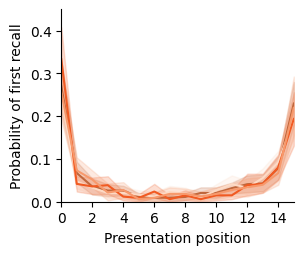

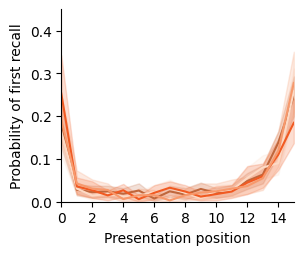

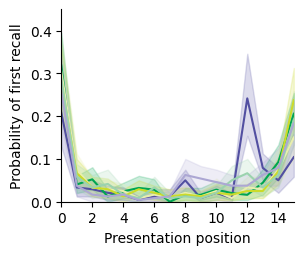

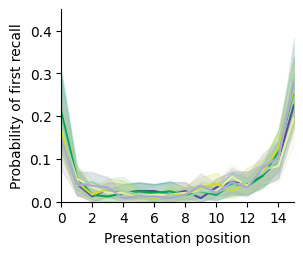

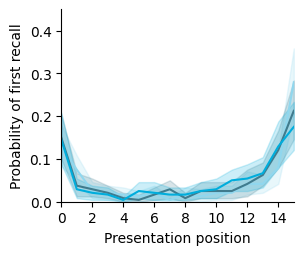

In [5]:
ylim = [0, 0.45]
combo_lineplot(results['pnr'][0], include_conds=random, include_lists='Early', fname='pfr_early_random', xlabel='Presentation position', ylabel='Probability of first recall', ylim=ylim);
combo_lineplot(results['pnr'][0], include_conds=random, include_lists='Late', fname='pfr_late_random', xlabel='Presentation position', ylabel='Probability of first recall', ylim=ylim);
combo_lineplot(results['pnr'][0], include_conds=non_adaptive_exclude_random, include_lists='Early', fname='pfr_early_nonadaptive', xlabel='Presentation position', ylabel='Probability of first recall', ylim=ylim);
combo_lineplot(results['pnr'][0], include_conds=non_adaptive_exclude_random, include_lists='Late', fname='pfr_late_nonadaptive', xlabel='Presentation position', ylabel='Probability of first recall', ylim=ylim);
combo_lineplot(results['pnr'][0], include_conds='adaptive', include_lists=['destabilize', 'random', 'stabilize'], fname='pfr_adaptive', xlabel='Presentation position', ylabel='Probability of first recall', ylim=ylim);

Lag conditional response probability

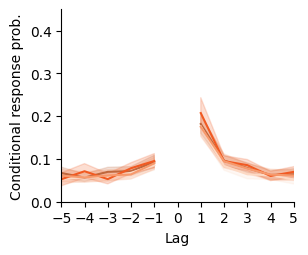

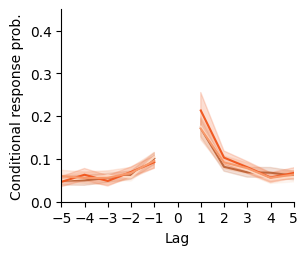

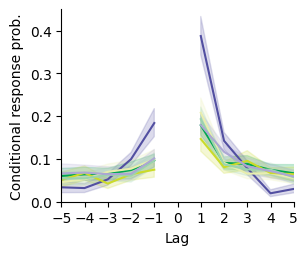

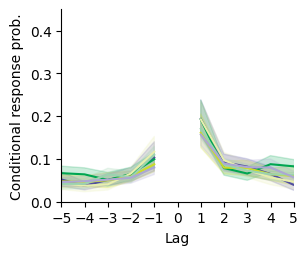

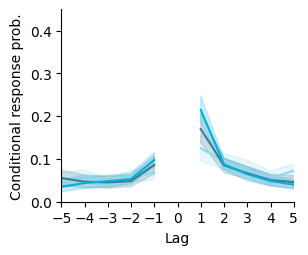

In [6]:
ylim = [0, 0.45]
combo_lineplot(results['lagcrp'], include_conds=random, include_lists='Early', fname='crp_early_random', xlabel='Lag', ylabel='Conditional response prob.', ylim=ylim);
combo_lineplot(results['lagcrp'], include_conds=random, include_lists='Late', fname='crp_late_random', xlabel='Lag', ylabel='Conditional response prob.', ylim=ylim);
combo_lineplot(results['lagcrp'], include_conds=non_adaptive_exclude_random, include_lists='Early', fname='crp_early_nonadaptive', xlabel='Lag', ylabel='Conditional response prob.', ylim=ylim);
combo_lineplot(results['lagcrp'], include_conds=non_adaptive_exclude_random, include_lists='Late', fname='crp_late_nonadaptive', xlabel='Lag', ylabel='Conditional response prob.', ylim=ylim);
combo_lineplot(results['lagcrp'], include_conds='adaptive', include_lists=['destabilize', 'random', 'stabilize'], fname='crp_adaptive', xlabel='Lag', ylabel='Conditional response prob.', ylim=ylim);

Serial position curves

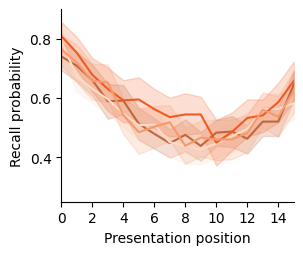

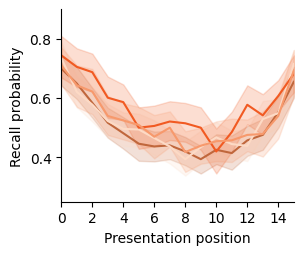

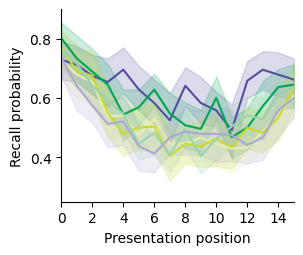

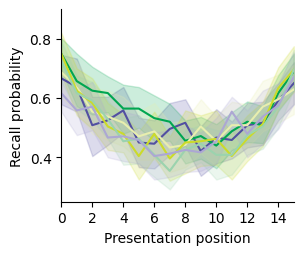

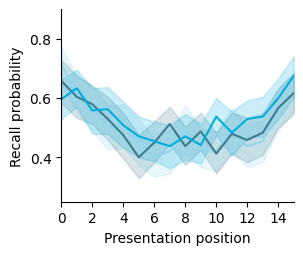

In [7]:
ylim = [0.25, 0.9]
combo_lineplot(results['spc'], include_conds=random, include_lists='Early', fname='spc_early_random', xlabel='Presentation position', ylabel='Recall probability', ylim=ylim);
combo_lineplot(results['spc'], include_conds=random, include_lists='Late', fname='spc_late_random', xlabel='Presentation position', ylabel='Recall probability', ylim=ylim);
combo_lineplot(results['spc'], include_conds=non_adaptive_exclude_random, include_lists='Early', fname='spc_early_nonadaptive', xlabel='Presentation position', ylabel='Recall probability', ylim=ylim);
combo_lineplot(results['spc'], include_conds=non_adaptive_exclude_random, include_lists='Late', fname='spc_late_nonadaptive', xlabel='Presentation position', ylabel='Recall probability', ylim=ylim);
combo_lineplot(results['spc'], include_conds='adaptive', include_lists=['destabilize', 'random', 'stabilize'], fname='spc_adaptive', xlabel='Presentation position', ylabel='Recall probability', ylim=ylim);

Fingerprints

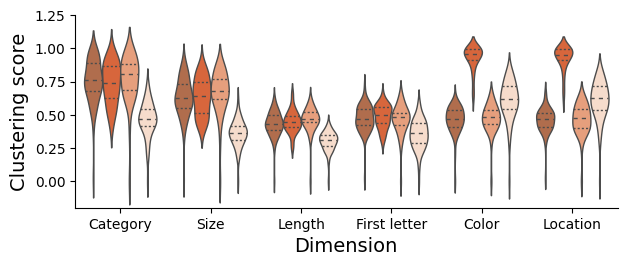

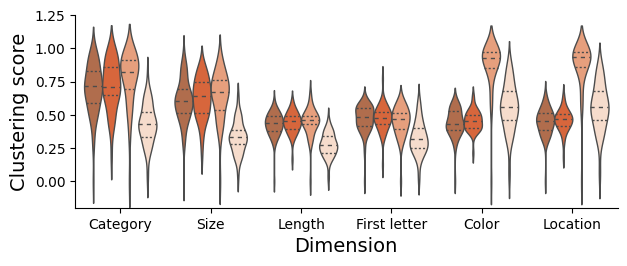

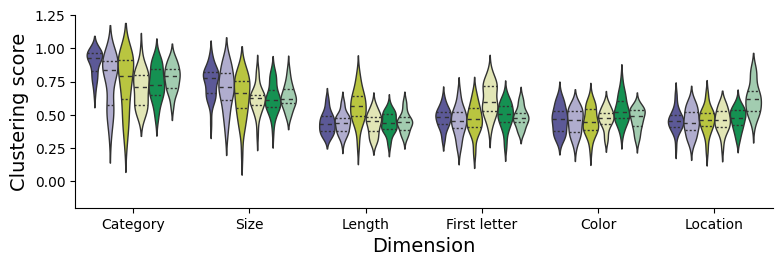

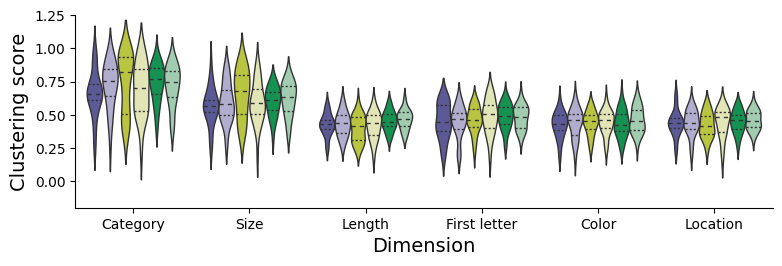

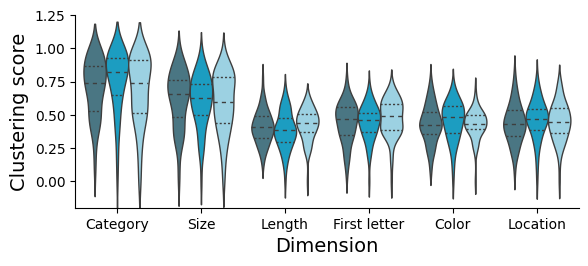

In [8]:
ylim = [-0.2, 1.25]
combo_fingerprint_plot(results['fingerprint'], include_conds=random, include_lists='Early', fname='fingerprint_early_random', ylim= ylim, figsize=(7, 2.5));
combo_fingerprint_plot(results['fingerprint'], include_conds=random, include_lists='Late', fname='fingerprint_late_random', ylim=ylim, figsize=(7, 2.5));
combo_fingerprint_plot(results['fingerprint'], include_conds=non_adaptive_exclude_random, include_lists='Early', fname='fingerprint_early_nonadaptive', ylim= ylim, figsize=(9, 2.5));
combo_fingerprint_plot(results['fingerprint'], include_conds=non_adaptive_exclude_random, include_lists='Late', fname='fingerprint_late_nonadaptive', ylim=ylim, figsize=(9, 2.5));
combo_fingerprint_plot(results['fingerprint'], include_conds=['adaptive'], include_lists=['random', 'stabilize', 'destabilize'], fname='fingerprint_adaptive', ylim=ylim, figsize=(6.5, 2.5));

Accuracy (adaptive conditions only)

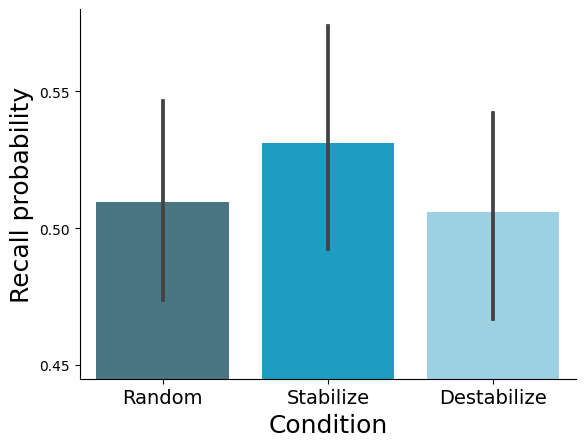

In [9]:
df = results['accuracy']['adaptive'].data.reset_index().melt(id_vars=['Subject', 'List'], value_name='Recall probability').rename({'List': 'Condition'}, axis=1).drop('variable', axis=1)
sns.barplot(data=df, x='Condition', y='Recall probability', palette=[colors['random'], colors['stabilize'], colors['destabilize']], order=['random', 'stabilize', 'destabilize'])
plt.ylim([0.445, 0.58])

ax = plt.gca()
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.set_xticklabels([x.get_text().capitalize() for x in ax.get_xticklabels()], rotation=0, fontsize=14)
ax.set_yticks([0.45, 0.5, 0.55])

plt.ylabel('Recall probability', fontsize=18)
plt.xlabel('Condition', fontsize=18)

plt.savefig(os.path.join(figdir, 'accuracy_adaptive.pdf'), bbox_inches='tight')

# Figure 2: early versus late differences in recall dynamics

For the non-adaptive conditions, recall dynamics on early vs. late lists reflect performance under difference conditions:
  - Feature rich, reduced: control conditions
    - Feature rich: random word order on both early and late lists; visual features vary across words
    - Reduced: random word order on both early and late lists; visual features held constant across words
  - Category, size, length, first letter, color, location
    - Words are sorted by the given feature during the first 8 lists ("Early")
    - Words order is randomized for the second 8 lists ("Late")
  - Reduced (early), Reduced (late):
    - Word order is randomized in all lists, for both conditions
    - Reduced (early): visual features are held constant for the first 8 lists ("Early") but vary for the second 8 lists ("Late")
    - Reduced (late): visual features vary for the first 8 lists but are held constant for the second 8 lists
  
Each adaptive conditions reflects lists presented in a different (relative) order, according to the participant's average "fingerprint" from all lists up to that point:
  - Random: control condition; words are sorted randomly
  - Stabilize: words are sorted to *maximize* agreement with the participant's average fingerprint
  - Destabilize: words are sorted to *minimize* agreement with the participant's average fingerprint

Probability of first recall differences

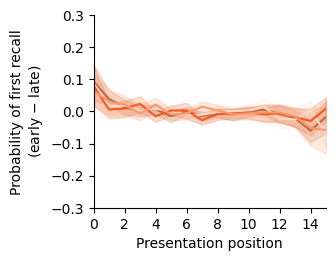

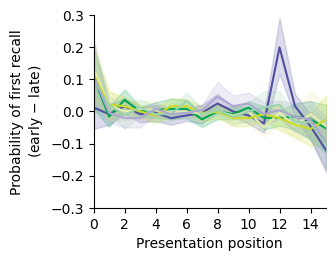

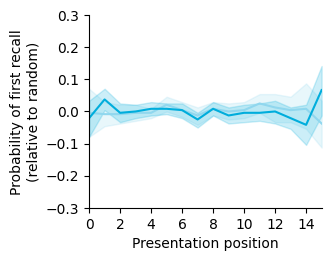

In [10]:
ylim = [-0.3, 0.3]

pfr_diffs_random = get_diffs(results['pnr'][0], contrast={'Early': 'Late'}, include_conds=random)['Early - Late']
combo_lineplot(pfr_diffs_random, include_conds=random, include_lists=['Early'], fname='pfr_random_diffs', xlabel='Presentation position', ylabel='Probability of first recall\n(early $-$ late)', ylim=ylim);

pfr_diffs = get_diffs(results['pnr'][0], contrast={'Early': 'Late'}, include_conds=non_adaptive_exclude_random)['Early - Late']
combo_lineplot(pfr_diffs, include_conds=non_adaptive_exclude_random, include_lists=['Early'], fname='pfr_nonadaptive_diffs', xlabel='Presentation position', ylabel='Probability of first recall\n(early $-$ late)', ylim=ylim);

pfr_diffs_adaptive = get_diffs(results['pnr'][0], contrast={'stabilize': 'random', 'destabilize': 'random'}, include_conds='adaptive')
combo_lineplot(stack_diffs(pfr_diffs_adaptive), include_lists=['stabilize', 'destabilize'], fname='pfr_adaptive_diffs', xlabel='Presentation position', ylabel='Probability of first recall\n(relative to random)', ylim=ylim);

Lag conditional response probability differences

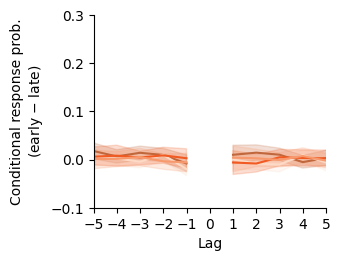

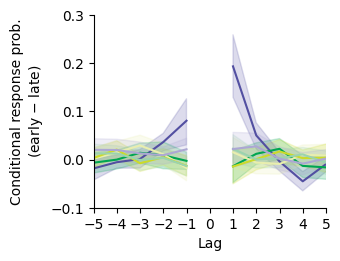

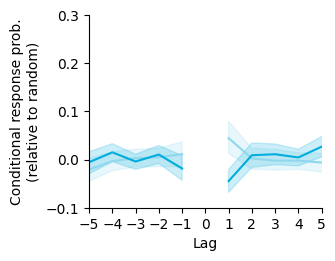

In [11]:
ylim = [-0.1, 0.3]

crp_diffs_random = get_diffs(results['lagcrp'], contrast={'Early': 'Late'}, include_conds=random)['Early - Late']
combo_lineplot(crp_diffs_random, include_conds=random, include_lists=['Early'], fname='crp_random_diffs', xlabel='Lag', ylabel='Conditional response prob.\n(early $-$ late)', ylim=ylim);

crp_diffs = get_diffs(results['lagcrp'], contrast={'Early': 'Late'}, include_conds=non_adaptive_exclude_random)['Early - Late']
combo_lineplot(crp_diffs, include_conds=non_adaptive_exclude_random, include_lists=['Early'], fname='crp_nonadaptive_diffs', xlabel='Lag', ylabel='Conditional response prob.\n(early $-$ late)', ylim=ylim);

crp_diffs_adaptive = get_diffs(results['lagcrp'], contrast={'stabilize': 'random', 'destabilize': 'random'}, include_conds='adaptive')
combo_lineplot(stack_diffs(crp_diffs_adaptive), include_lists=['stabilize', 'destabilize'], fname='crp_adaptive_diffs', xlabel='Lag', ylabel='Conditional response prob.\n(relative to random)', ylim=ylim);

Serial position curve differences

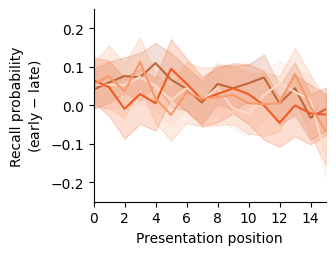

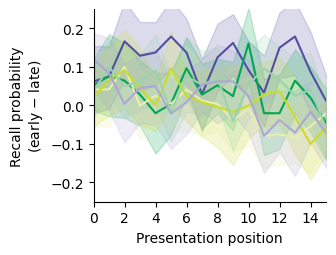

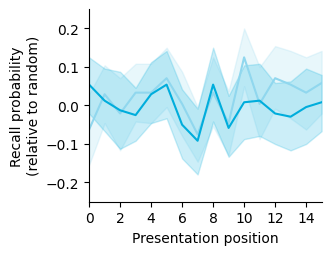

In [12]:
ylim = [-0.25, 0.25]

spc_diffs = get_diffs(results['spc'], contrast={'Early': 'Late'}, include_conds=random)['Early - Late']
combo_lineplot(spc_diffs, include_conds=random, include_lists=['Early'], fname='spc_random_diffs', xlabel='Presentation position', ylabel='Recall probability\n(early $-$ late)', ylim=ylim);

spc_diffs = get_diffs(results['spc'], contrast={'Early': 'Late'}, include_conds=non_adaptive_exclude_random)['Early - Late']
combo_lineplot(spc_diffs, include_conds=non_adaptive_exclude_random, include_lists=['Early'], fname='spc_nonadaptive_diffs', xlabel='Presentation position', ylabel='Recall probability\n(early $-$ late)', ylim=ylim);

spc_diffs_adaptive = get_diffs(results['spc'], contrast={'stabilize': 'random', 'destabilize': 'random'}, include_conds='adaptive')
combo_lineplot(stack_diffs(spc_diffs_adaptive), include_lists=['stabilize', 'destabilize'], fname='spc_adaptive_diffs', xlabel='Presentation position', ylabel='Recall probability\n(relative to random)', ylim=ylim);

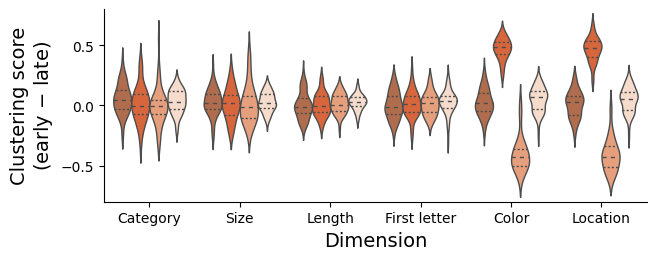

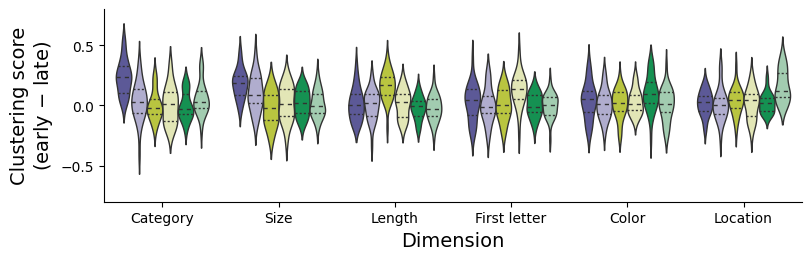

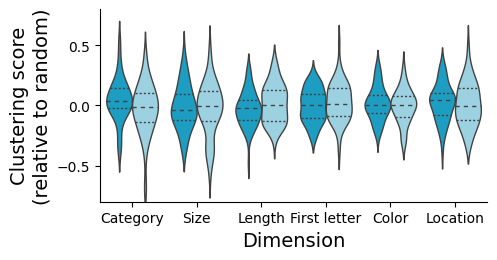

In [13]:
ylim = [-0.8, 0.8]

fingerprint_diffs_random = get_diffs(results['fingerprint'], contrast={'Early': 'Late'}, include_conds=random)['Early - Late']
combo_fingerprint_plot(fingerprint_diffs_random, include_conds=random, include_lists=['Early'], fname='fingerprint_random_diffs', ylabel='Clustering score\n(early $-$ late)', ylim=ylim, figsize=(7, 2.5));

fingerprint_diffs = get_diffs(results['fingerprint'], contrast={'Early': 'Late'}, include_conds=non_adaptive_exclude_random)['Early - Late']
combo_fingerprint_plot(fingerprint_diffs, include_conds=non_adaptive_exclude_random, include_lists=['Early'], fname='fingerprint_nonadaptive_diffs', ylabel='Clustering score\n(early $-$ late)', ylim=ylim, figsize=(9, 2.5));

fingerprint_diffs_adaptive = get_diffs(results['fingerprint'], contrast={'stabilize': 'random', 'destabilize': 'random'}, include_conds='adaptive')
combo_fingerprint_plot(stack_diffs(fingerprint_diffs_adaptive), include_lists=['stabilize', 'destabilize'], fname='fingerprint_adaptive_diffs', ylabel='Clustering score\n(relative to random)', ylim=ylim, figsize=(5, 2.5));

 # Figure 3: detailed recall initiation dynamics

- For each non-adaptive condition, create early, late, and diff heatmaps: row = recall position; column = output position; color = p(recall)
- For each adaptive condition, create stabilize, destabilize, random, and diff (stabilize vs. random, destabilize vs. random) heatmaps in the same format

 

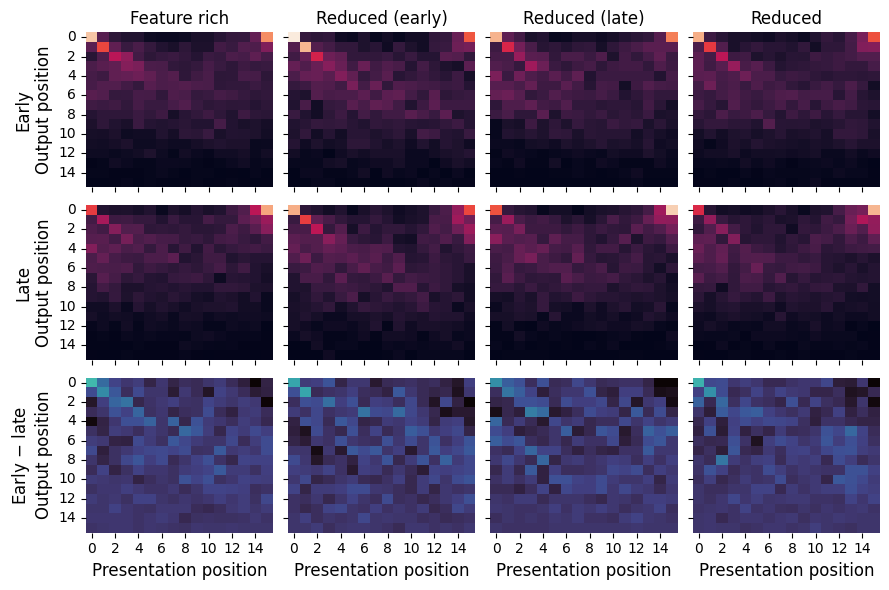

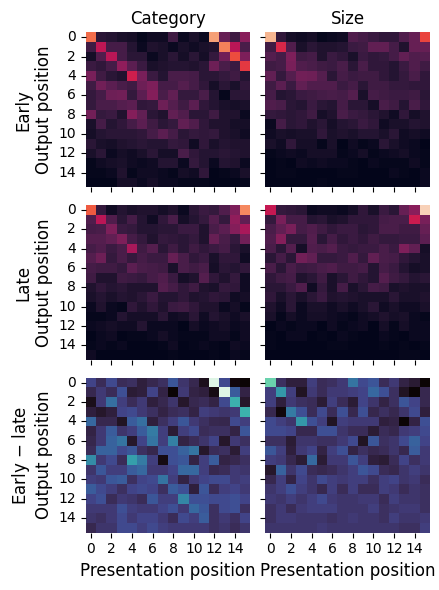

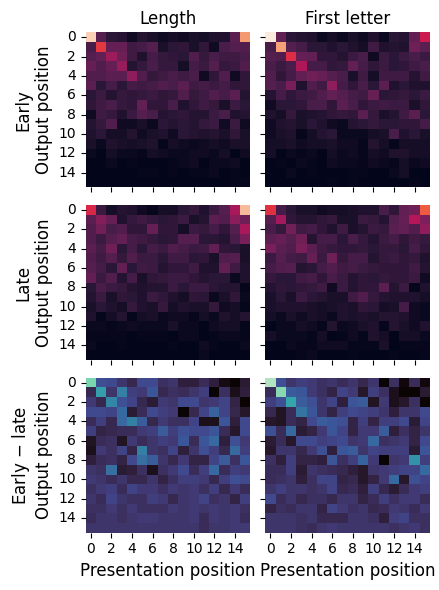

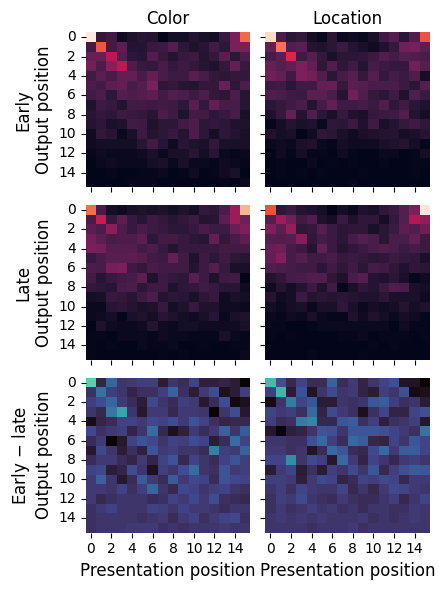

In [14]:
x = pnr_matrix(results['pnr'], include_conds='all')

# non-adaptive heatmaps
for group, conds in feature_groupings.items():
    if group == 'adaptive':
        continue    

    plot_heatmaps(x, include_conds=conds, contrasts={'Early': 'Late'}, fname=f'pnr_heatmaps_{group}', vmin=0, vmax=0.3, dvmin=-0.05, dvmax=0.15, width=2.25, xlabel='Presentation position', ylabel='Output position')

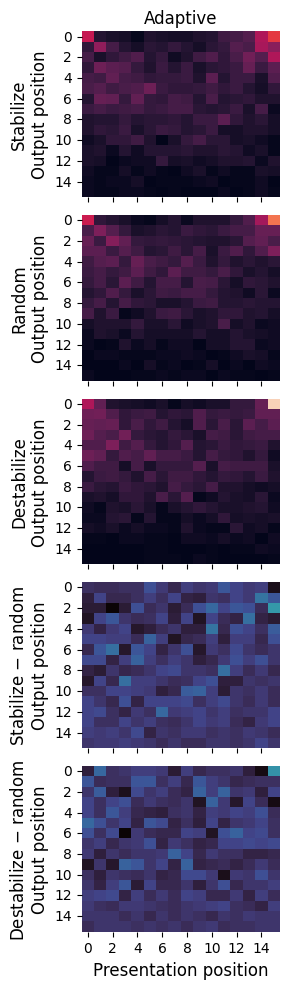

In [15]:
# adaptive heatmaps
plot_heatmaps(x, include_conds=['adaptive'], include_lists=['stabilize', 'random', 'destabilize'], contrasts={'stabilize': 'random', 'destabilize': 'random'}, fname='pnr_heatmaps_adaptive', vmin=0, vmax=0.3, dvmin=-0.05, dvmax=0.15, width=3, height=2, xlabel='Presentation position', ylabel='Output position');

# Figure 4: list order effects (by condition)

For each condition (color), plot recall accuracy (y-axis) as a function of list number (x-axis).
  - Panel 1: random conditions (feature rich, reduced (early), reduced(late), and reduced)
  - Panel 2: feature manipulation conditions
  - Panel 3: adaptive conditions (split by list)

In [16]:
# non-adaptive conditions: organize by results key
random_accuracy = accuracy2df({c: results_by_list['accuracy'][c] for c in feature_groupings['random']})
nonadaptive_accuracy = accuracy2df({c: results_by_list['accuracy'][c] for c in non_adaptive_exclude_random})

# adaptive conditons: assign manually
adaptive_accuracy = results_by_list['accuracy']['adaptive'].data.reset_index().rename({0: 'Accuracy'}, axis=1)
adaptive_accuracy['Condition'] = adaptive_accuracy.apply(adaptive_listnum2cond, axis=1)

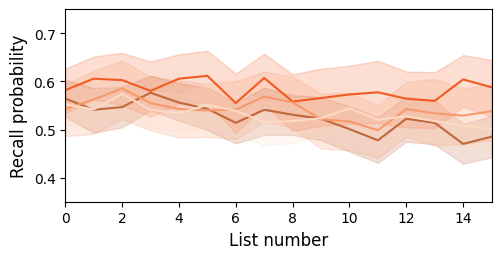

In [17]:
accuracy_by_list(random_accuracy, ylim=[0.35, 0.75], fname='random_accuracy_by_listnum');

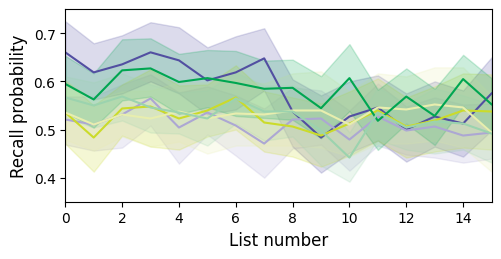

In [18]:
accuracy_by_list(nonadaptive_accuracy, ylim=[0.35, 0.75], fname='nonadaptive_accuracy_by_listnum');

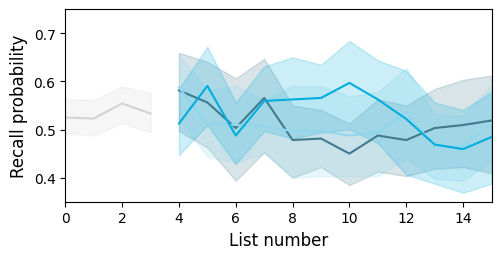

In [19]:
accuracy_by_list(adaptive_accuracy, ylim=[0.35, 0.75], fname='adaptive_accuracy_by_listnum');

# Figure 5: Interactions between feature clustering and accuracy

This figure is limited to the non-adaptive and non-random feature rich conditions (i.e., conditions with order manipulations on early vs. late lists).  Note: this will likely need to be split into several figures.

### Panel 1

For each condition, display a single dot for each participant, where the $x$-coordinate shows the early accuracy (averaged across Early lists) and the $y$-coordinate shows the average clustering score (for the given condition's highlighted feature).  The resulting scatterplot shows (a) how different list organizations affect clustering and (b) how different list organizations/clustering affects recall.

In [20]:
accuracy_diffs = get_diffs(results['accuracy'], contrast={'Early': 'Late'}, include_conds=non_adaptive_exclude_random)['Early - Late']

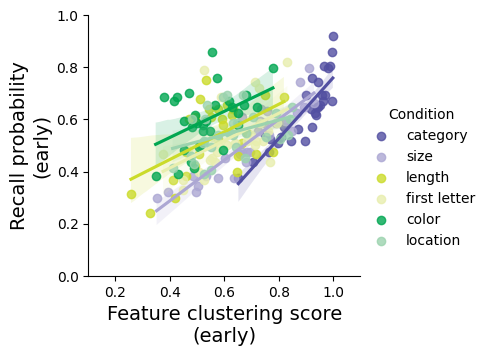

In [21]:
fingerprint_scatterplot_by_category(results, include_conds=non_adaptive_exclude_random, include_lists='Early', ylabel='Recall probability\n(early)', xlabel='Feature clustering score\n(early)', y='accuracy', fname='clustering_vs_accuracy_scatterplot_early', xlim=[0.1, 1.1], ylim=[0, 1]);

### Panel 2

Same as Panel 1, but for late lists.  

This will show whether/how earlier lists' organization affects clustering/performance on later lists.

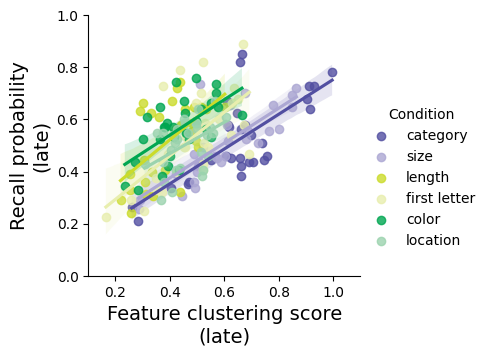

In [22]:
fingerprint_scatterplot_by_category(results, include_conds=non_adaptive_exclude_random, include_lists='Late', y='accuracy', xlabel='Feature clustering score\n(late)', ylabel='Recall probability\n(late)', fname='clustering_vs_accuracy_scatterplot_late', xlim=[0.1, 1.1], ylim=[0, 1]);

### Panel 3

Same as Panels 1 and 2, but the $x$-axis shows accuracy on Late lists and the $y$-axis shows clustering on Early lists.

The resulting scatterplot shows how/whether clustering on early lists carries over to performance on later (random) lists.

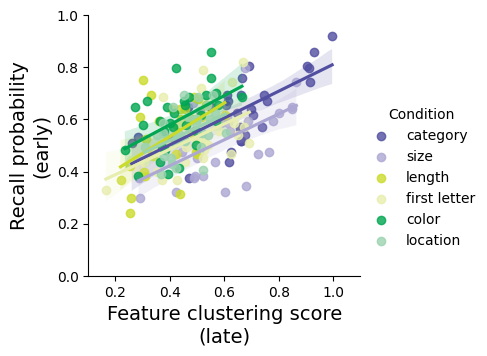

In [23]:
fingerprint_scatterplot_by_category(results, include_conds=non_adaptive_exclude_random, x_lists='Late', y_lists='Early', y='accuracy', fname='clustering_vs_accuracy_scatterplot_early_vs_late',
   xlabel='Feature clustering score\n(late)', ylabel='Recall probability\n(early)', xlim=[0.1, 1.1], ylim=[0, 1]);

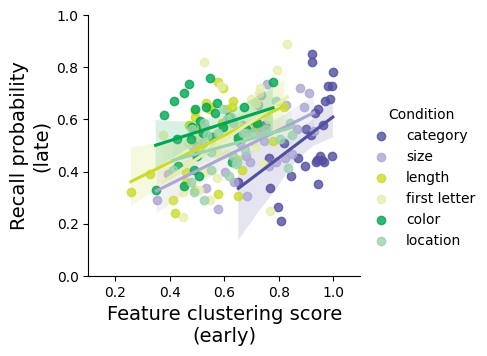

In [24]:
fingerprint_scatterplot_by_category(results, include_conds=non_adaptive_exclude_random, x_lists='Early', y_lists='Late', y='accuracy', fname='clustering_vs_accuracy_scatterplot_late_vs_early',
   xlabel='Feature clustering score\n(early)', ylabel='Recall probability\n(late)', xlim=[0.1, 1.1], ylim=[0, 1]);

### Panel 4

For each condition, display a single dot for each participant, where the $x$-coordinate shows the early vs. late accuracy (averaged across lists) and the $y$-coordinate shows the average clustering difference (for the given condition's highlighted feature) between early vs. late lists.

The resulting scatterplot shows how/whether different list organizations carry over to later (random) lists, and how that carryover might interact with recall accuracy differences between early vs. late lists.

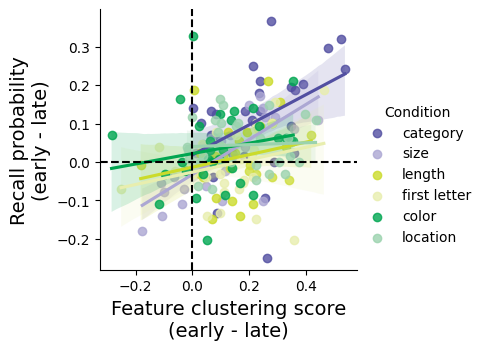

In [25]:
fingerprint_scatterplot_by_category({'accuracy': accuracy_diffs, 'fingerprint': fingerprint_diffs},
    include_conds=non_adaptive_exclude_random, include_lists='Early', y='accuracy', fname='clustering_vs_accuracy_scatterplot_diffs',
    xlabel='Feature clustering score\n(early - late)', ylabel='Recall probability\n(early - late)');

## Interactions between feature clustering and temporal clustering

### Panels 5, 6, 7, and 8

Same as Panels 1--4, but replace "Accuracy" with average temporal clustering score (on the same sets of lists).

In [26]:
results['temporal'] = {c: fingerprint2temporal(f) for c, f in results['fingerprint'].items()}

### Panel 5

For each condition, display a single dot for each participant, where the $x$-coordinate shows the early temporal clustering score (averaged across Early lists) and the $y$-coordinate shows the average feature clustering score (for the given condition's highlighted feature).  The resulting scatterplot shows (a) how different list organizations affect clustering and (b) how different list organizations/clustering affects temporal clustering.

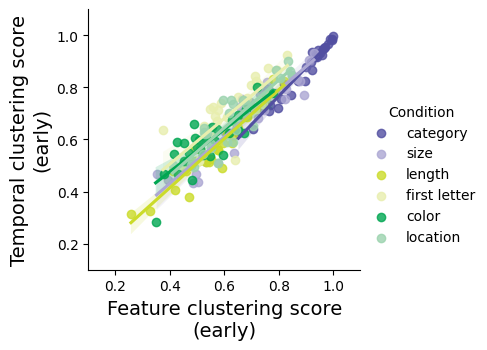

In [27]:
fingerprint_scatterplot_by_category(results, include_conds=non_adaptive_exclude_random, include_lists='Early', y='temporal', fname='clustering_vs_temporal_scatterplot_early',
                                    xlim=[0.1, 1.1], ylim=[0.1, 1.1], ylabel='Temporal clustering score\n(early)', xlabel='Feature clustering score\n(early)');

### Panel 6

Same as Panel 5, but for Late lists

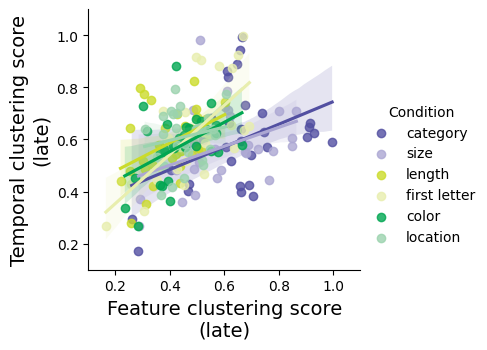

In [28]:
fingerprint_scatterplot_by_category(results, include_conds=non_adaptive_exclude_random, include_lists='Late', y='temporal', fname='clustering_vs_temporal_scatterplot_late',
                                    xlim=[0.1, 1.1], ylim=[0.1, 1.1], ylabel='Temporal clustering score\n(late)', xlabel='Feature clustering score\n(late)');

### Panel 7

Same as Panels 5 and 6, but the $x$-axis shows temporal clustering on Late lists and the $y$-axis shows feature clustering on Early lists.

The resulting scatterplot shows how/whether feature clustering on early lists relates to temporal clustering on later (random) lists.

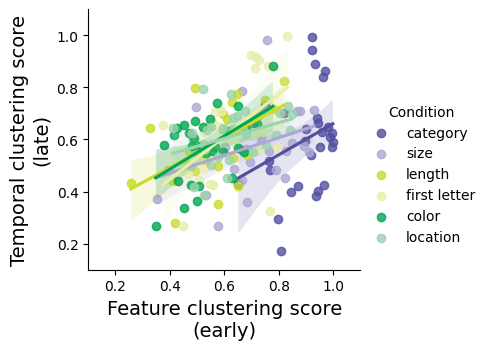

In [29]:
fingerprint_scatterplot_by_category(results, include_conds=non_adaptive_exclude_random, x_lists='Early', y_lists='Late', y='temporal', fname='clustering_vs_temporal_scatterplot_late_vs_early',
   xlabel='Feature clustering score\n(early)', ylabel='Temporal clustering score\n(late)', xlim=[0.1, 1.1], ylim=[0.1, 1.1]);

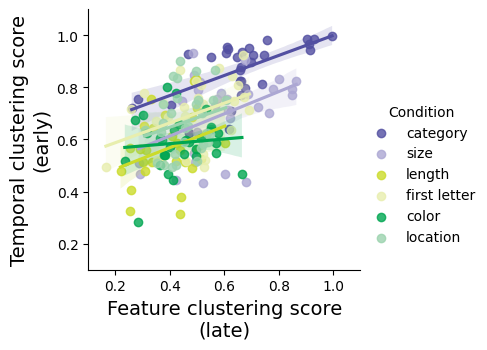

In [30]:
fingerprint_scatterplot_by_category(results, include_conds=non_adaptive_exclude_random, x_lists='Late', y_lists='Early', y='temporal', fname='clustering_vs_temporal_scatterplot_early_vs_late',
   xlabel='Feature clustering score\n(late)', ylabel='Temporal clustering score\n(early)', xlim=[0.1, 1.1], ylim=[0.1, 1.1]);

### Panel 8

For each condition, display a single dot for each participant, where the $x$-coordinate shows the early vs. late temporal clustering (averaged across lists) and the $y$-coordinate shows the average feature clustering difference (for the given condition's highlighted feature) between early vs. late lists.

The resulting scatterplot shows how/whether different list organizations carry over to later (random) lists, and how that carryover might interact with temporal clustering differences between early vs. late lists.

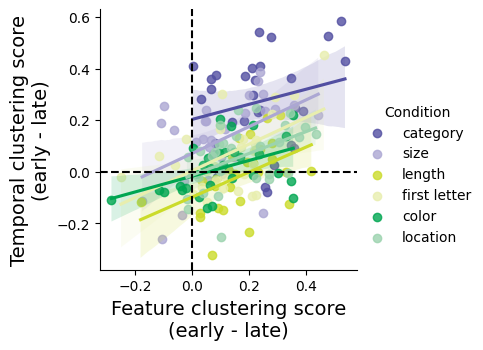

In [31]:
fingerprint_scatterplot_by_category({'temporal': {c: fingerprint2temporal(f) for c, f in fingerprint_diffs.items()}, 'fingerprint': fingerprint_diffs},
    include_conds=non_adaptive_exclude_random, include_lists='Early', y='temporal', fname='clustering_vs_temporal_scatterplot_diffs',
    xlabel='Feature clustering score\n(early - late)', ylabel='Temporal clustering score\n(early - late)');

## Condition-level effects

### Panels 9--16

Same as Panels 1--8, but instead of having 1 dot per person, average (across people) to get one dot per condition.  (See above for descriptions; for analogous panels, subtract 8 from the panel number)

*Panel 9*

For each condition display a single dot (averaged across subjects), where the $x$-coordinate shows the early accuracy (averaged across Early lists) and the $y$-coordinate shows the average clustering score (for the given condition's highlighted feature).  The resulting scatterplot shows (a) how different list organizations affect clustering and (b) how different list organizations/clustering affects recall.

xlabel: Clustering score, ylabel: Recall probability


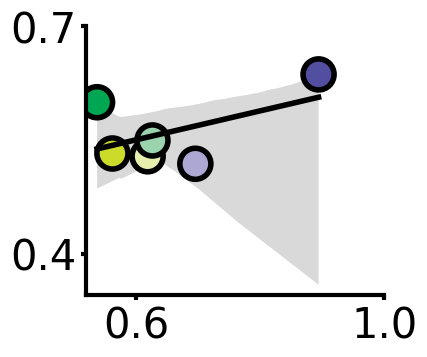

In [32]:
fingerprint_scatterplot_by_category(results, include_conds=non_adaptive_exclude_random, include_lists='Early', y='accuracy', average=True, fname='ave_clustering_vs_accuracy_scatterplot_early');

*Panel 10*

Same as Panel 9, but for late lists.  

This will show whether/how earlier lists' organization affects clustering/performance on later lists.

xlabel: Clustering score, ylabel: Recall probability


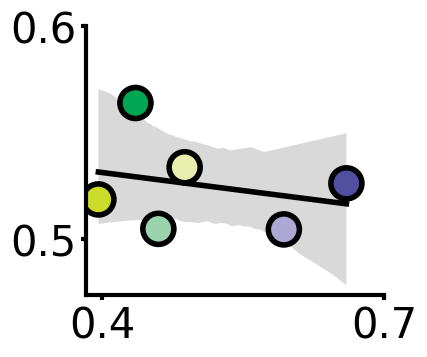

In [33]:
fingerprint_scatterplot_by_category(results, include_conds=non_adaptive_exclude_random, include_lists='Late', y='accuracy', average=True, fname='ave_clustering_vs_accuracy_scatterplot_late');

*Panel 11*

Same as Panels 9 and 10, but the $x$-axis shows accuracy on Late lists and the $y$-axis shows clustering on Early lists.

The resulting scatterplot shows how/whether clustering on early lists carries over to performance on later (random) lists.

xlabel: Clustering score (late), ylabel: Recall probability (early)


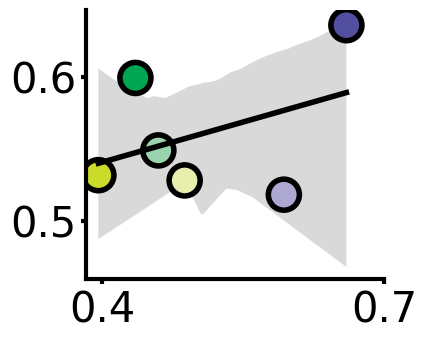

In [34]:
fingerprint_scatterplot_by_category(results, include_conds=non_adaptive_exclude_random, x_lists='Late', y_lists='Early', y='accuracy', average=True,  fname='ave_clustering_vs_accuracy_scatterplot_early_vs_late',
   xlabel='Clustering score (late)', ylabel='Recall probability (early)');

xlabel: Clustering score (early), ylabel: Recall probability (late)


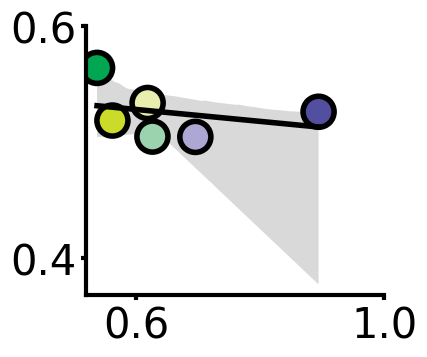

In [35]:
fingerprint_scatterplot_by_category(results, include_conds=non_adaptive_exclude_random, x_lists='Early', y_lists='Late', y='accuracy', average=True,  fname='ave_clustering_vs_accuracy_scatterplot_late_vs_early',
   xlabel='Clustering score (early)', ylabel='Recall probability (late)');

*Panel 12*

For each condition display a single dot (averaged across subjects), where the $x$-coordinate shows the early vs. late accuracy (averaged across lists) and the $y$-coordinate shows the average clustering difference (for the given condition's highlighted feature) between early vs. late lists.

The resulting scatterplot shows how/whether different list organizations carry over to later (random) lists, and how that carryover might interact with recall accuracy differences between early vs. late lists.

xlabel: Feature clustering score
(early - late), ylabel: Recall probability
(early - late)


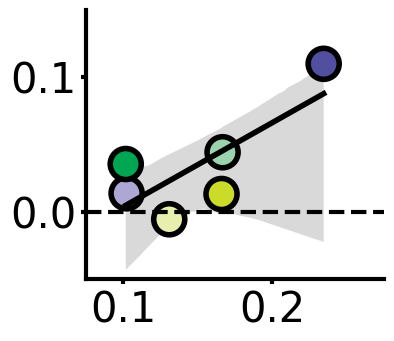

In [36]:
fingerprint_scatterplot_by_category({'accuracy': accuracy_diffs, 'fingerprint': fingerprint_diffs},
    include_conds=non_adaptive_exclude_random, include_lists='Early', y='accuracy', average=True,  fname='ave_clustering_vs_accuracy_scatterplot_diffs',
    xlabel='Feature clustering score\n(early - late)', ylabel='Recall probability\n(early - late)', ylim=[-0.05, 0.15], xlim=[0.075, 0.275]);

*Panel 13*

For each condition display a single dot (average across subjects), where the $x$-coordinate shows the early temporal clustering score (averaged across Early lists) and the $y$-coordinate shows the average feature clustering score (for the given condition's highlighted feature).  The resulting scatterplot shows (a) how different list organizations affect clustering and (b) how different list organizations/clustering affects temporal clustering.

xlabel: Feature clustering score, ylabel: Temporal clustering score


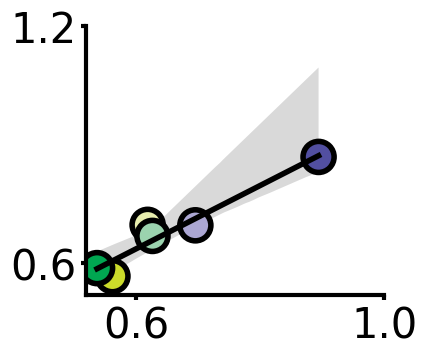

In [37]:
fingerprint_scatterplot_by_category(results, include_conds=non_adaptive_exclude_random, include_lists='Early', y='temporal', average=True, fname='ave_clustering_vs_temporal_scatterplot_early',
                                    ylabel='Temporal clustering score', xlabel='Feature clustering score');

*Panel 14*

Same as Panel 13, but for Late lists

xlabel: Feature clustering score, ylabel: Temporal clustering score


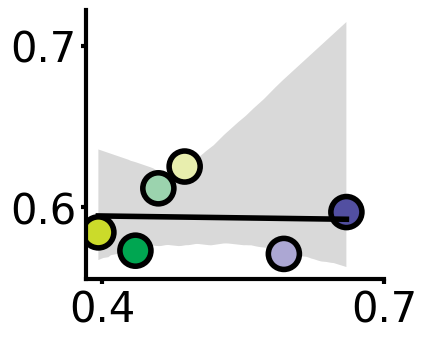

In [38]:
fingerprint_scatterplot_by_category(results, include_conds=non_adaptive_exclude_random, include_lists='Late', y='temporal', average=True,  fname='ave_clustering_vs_temporal_scatterplot_late',
                                    ylabel='Temporal clustering score', xlabel='Feature clustering score');

*Panel 15*

Same as Panels 13 and 14, but the $x$-axis shows temporal clustering on Late lists and the $y$-axis shows feature clustering on Early lists.

The resulting scatterplot shows how/whether feature clustering on early lists relates to temporal clustering on later (random) lists.

xlabel: Feature clustering score
(late), ylabel: Temporal clustering score
(early)


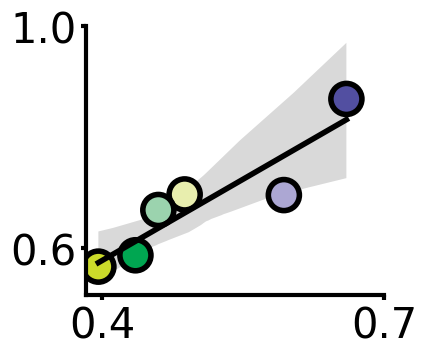

In [39]:
fingerprint_scatterplot_by_category(results, include_conds=non_adaptive_exclude_random, x_lists='Late', y_lists='Early', y='temporal', average=True,  fname='ave_clustering_vs_temporal_scatterplot_early_vs_late',
   xlabel='Feature clustering score\n(late)', ylabel='Temporal clustering score\n(early)');

xlabel: Feature clustering score
(early), ylabel: Temporal clustering score
(late)


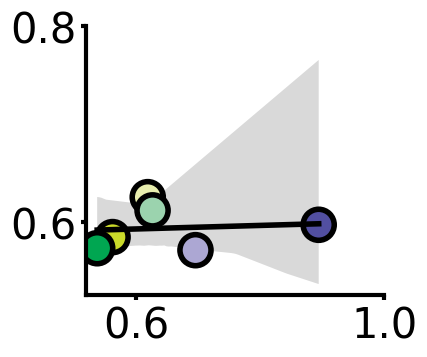

In [40]:
fingerprint_scatterplot_by_category(results, include_conds=non_adaptive_exclude_random, x_lists='Early', y_lists='Late', y='temporal', average=True,  fname='ave_clustering_vs_temporal_scatterplot_late_vs_early',
   xlabel='Feature clustering score\n(early)', ylabel='Temporal clustering score\n(late)');

*Panel 16*

For each condition display a single dot (average across subjects), where the $x$-coordinate shows the early vs. late temporal clustering (averaged across lists) and the $y$-coordinate shows the average feature clustering difference (for the given condition's highlighted feature) between early vs. late lists.

The resulting scatterplot shows how/whether different list organizations carry over to later (random) lists, and how that carryover might interact with temporal clustering differences between early vs. late lists.

xlabel: Feature clustering score
(early - late), ylabel: Temporal clustering score
(early - late)


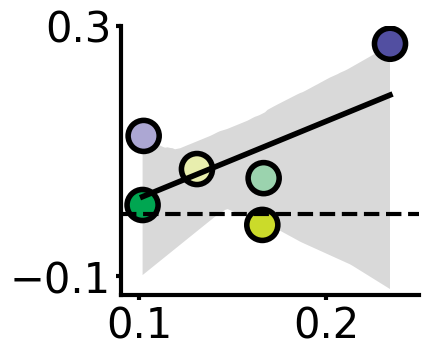

In [41]:
fingerprint_scatterplot_by_category({'temporal': {c: fingerprint2temporal(f) for c, f in fingerprint_diffs.items()}, 'fingerprint': fingerprint_diffs},
    include_conds=non_adaptive_exclude_random, include_lists='Early', y='temporal', average=True,  fname='ave_clustering_vs_temporal_scatterplot_diffs',
    xlabel='Feature clustering score\n(early - late)', ylabel='Temporal clustering score\n(early - late)', xlim=[0.09, 0.25], ylim=[-0.13, 0.3]);

## Similarities in clustering (within each condition)

### Panel 17

For each condition, create a heatmap showing the correlations (across subjects) between clustering scores for different features.  (Alternative: plot this using circos plots.)

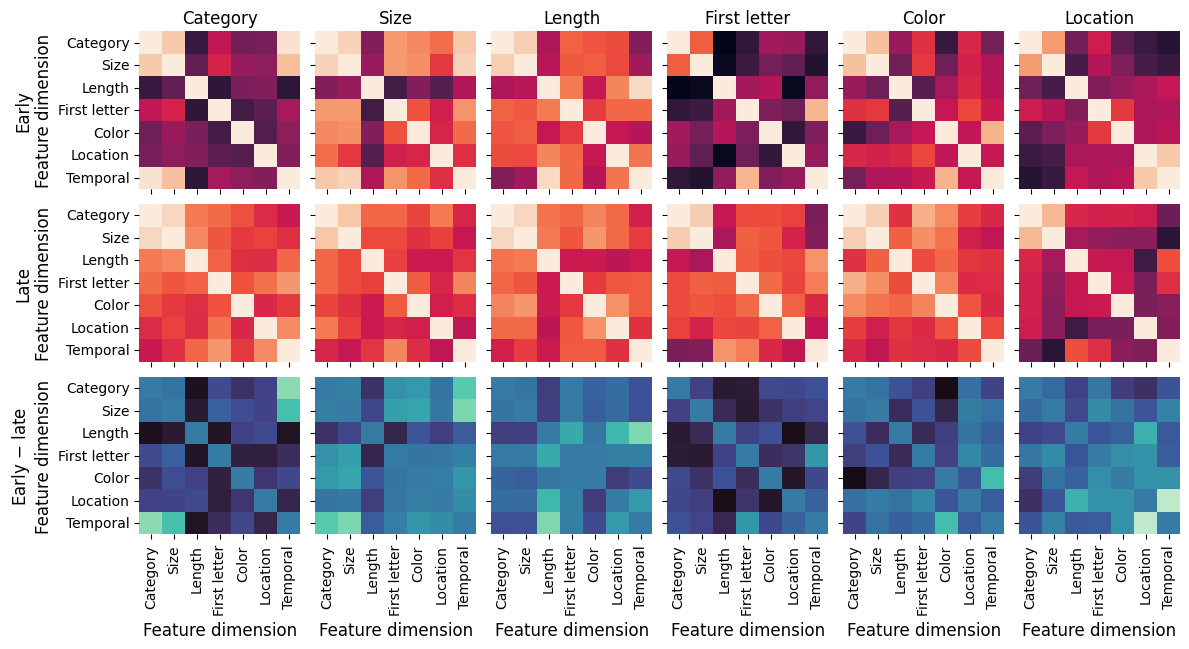

In [42]:
cluster_mats = clustering_matrices(results['fingerprint'], include_conds=non_adaptive_exclude_random, include_lists='all')
plot_heatmaps(cluster_mats, include_conds=non_adaptive_exclude_random, include_lists='all', contrasts={'Early': 'Late'}, fname='clustering_heatmaps_nonadaptive_nonrandom', vmin=-0.2, vmax=1.0, dvmin=-0.8, dvmax=0.8, fontsize=12, width=2, height=2.2, xlabel='Feature dimension', ylabel='Feature dimension');



### Panel 18

Create a matrix where each row is a condition and each column is a feature (including temporal clustering).  Create a 2D hypertools plot where each condition is a dot (colored by condition).

In [43]:
non_adaptive = sort_by_grouping([*random, *non_adaptive_exclude_random], feature_groupings)
average_early_fingerprints = average_by_cond(results['fingerprint'], include_conds=non_adaptive, include_lists='Early')
average_late_fingerprints = average_by_cond(results['fingerprint'], include_conds=non_adaptive, include_lists='Late')

pca = PCA(n_components=2)
pca.fit(pd.concat([average_early_fingerprints, average_late_fingerprints], axis=0));

early_fingerprints_lowD = pd.DataFrame(pca.transform(average_early_fingerprints), index=average_early_fingerprints.index)
late_fingerprints_lowD = pd.DataFrame(pca.transform(average_late_fingerprints), index=average_late_fingerprints.index)

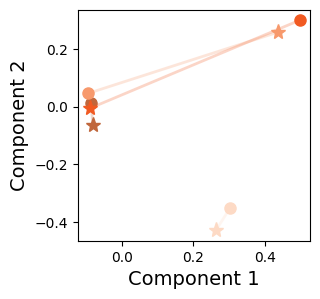

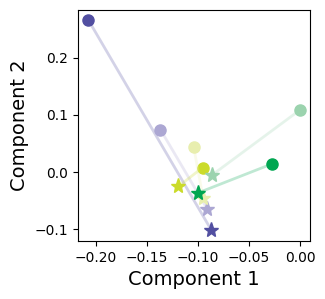

In [44]:
plot_features(early_fingerprints_lowD, late_fingerprints_lowD, random, fname='clustering_pca_random')
plot_features(early_fingerprints_lowD, late_fingerprints_lowD, non_adaptive_exclude_random, fname='clustering_pca_nonadaptive_nonrandom')

# Figure 6: Fingerprint "carryover" by feature type

This figure is limited to the non-adaptive and non-random feature rich conditions (i.e., conditions with order manipulations on early vs. late lists).

We'll create a scatterplot, where each dot reflects a participant ($x$-coordinate: clustering score for the condition's feature in Early lists; $y$-coordinate: clustering score for the condition's feature in Late lists).  The idea is to show how clustering (for the feature reflected by the current condition) carry over from the Early (organized) lists to the Late (random) lists.

## Panel 1: subject-wise effects



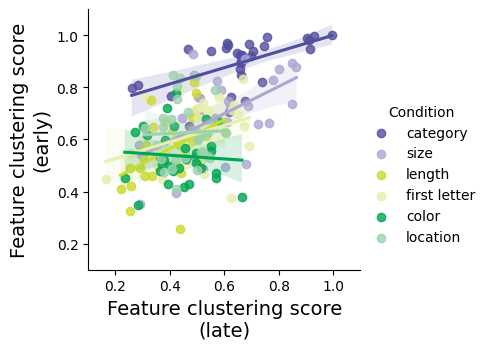

In [45]:
fingerprint_scatterplot_by_category(results, include_conds=non_adaptive_exclude_random, x_lists='Late', y_lists='Early', y='fingerprint', fname='feature_clustering_scatterplot_early_vs_late',
   ylabel='Feature clustering score\n(early)', xlabel='Feature clustering score\n(late)', xlim=[0.1, 1.1], ylim=[0.1, 1.1]);

## Panel 2: condition-level effects

Same as panel 1, but average across participants (one dot per condition)

xlabel: Clustering score (late), ylabel: Clustering score (early)


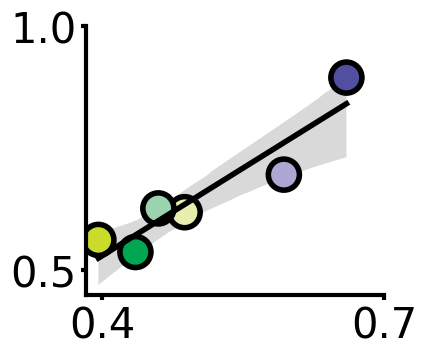

In [46]:
fingerprint_scatterplot_by_category(results, include_conds=non_adaptive_exclude_random, x_lists='Late', y_lists='Early', y='fingerprint', average=True, fname='ave_feature_clustering_scatterplot_early_vs_late',
   ylabel='Clustering score (early)', xlabel='Clustering score (late)');

# Figure 7: Fingerprint trajectories

For each condition, project each list's fingerprint into 2D (3D?).  Plot the trajectory taken for Early lists ($\circ$) and Late lists ($\star$), where each line reflects one condition.  Depending on how similar the trajectories are, it may or may not make sense to show the individual participants' trajectories vs. only the average trajectory (across participants).

Also show fingerprint distance (across successive lists) as a function of list number-- this will show whether fingerprints change substantially from Early to Late lists.

For the adaptive conditions, fingerprint distance by list number (separated by list type) will also tell us whether the adaptive conditions are "working" by either pushing people towards a stable fingerprint (stabilize) or destabilizing their fingerprint (destabilize).

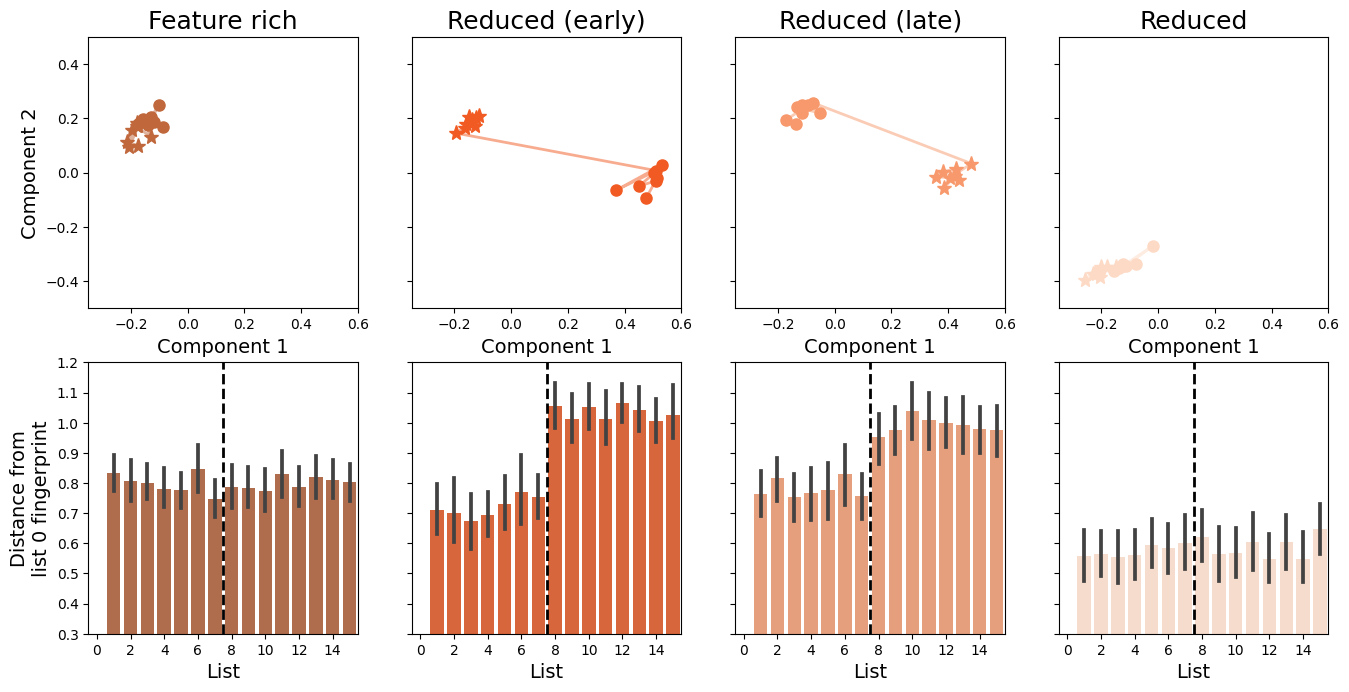

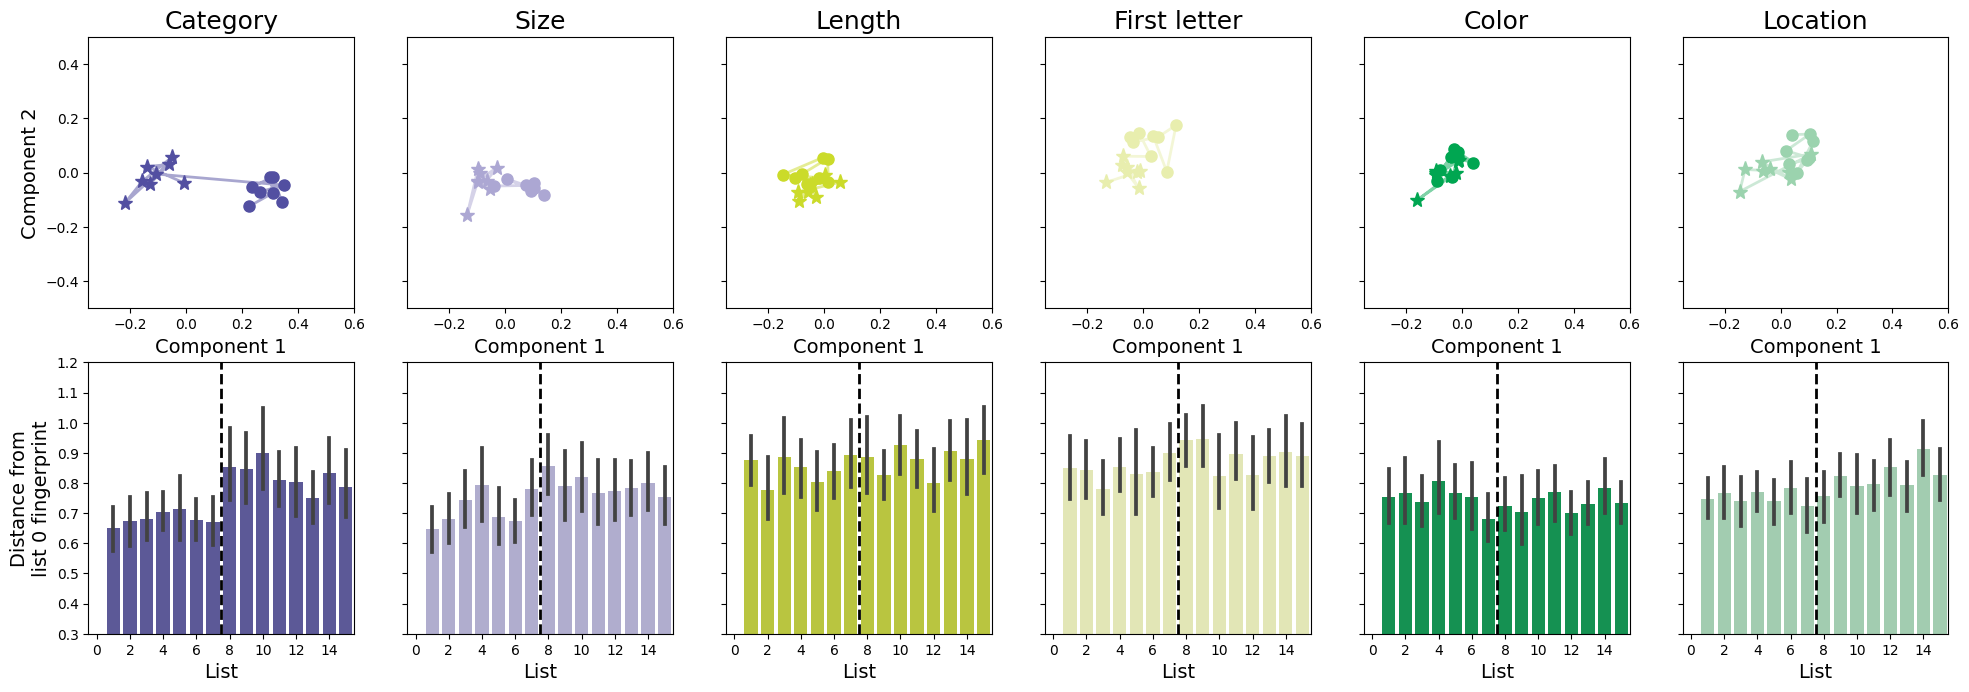

In [47]:
xlim = [[-0.35, 0.6], [-0.5, 15.5]]
ylim = [[-0.5, 0.5], [0.3, 1.2]]

plot_trajectories(results_by_list['fingerprint'], include_conds=random, fname='feature_clustering_trajectories_random', xlim=xlim, ylim=ylim);
plot_trajectories(results_by_list['fingerprint'], include_conds=non_adaptive_exclude_random, fname='feature_clustering_trajectories_nonadaptive', xlim=xlim, ylim=ylim);

# Figure 8: Event boundaries

In the discrete feature conditions (category, size, starting letter, word length), we can define an "event boundary" as occuring within a list when words $n$ and $n + 1$ have different feature values for the given condition's feature of interest.  (The "boundary" occurs at presentation $n + 1$, since that's the moment when the feature value actually changes.)

We can ask, as a function of *lag* to the boundary word:
  - What's the probability of recall (e.g., do we see mini "primacy" and "recency" effects before/after boundaries?)
  - How likely are within vs. across "event" words to be recalled together?  (Note: this analysis could take us down a long rabbit hole of other things to explore-- not sure it's "within scope" of this paper, but I'm noting the idea here to bookmark it)

It could also be interesting to explore:
  - Do lists with more boundaries get recalled better (or worse)?
  - Do lists with more boundaries have higher temporal clustering scores?
  - Do lists with more boundaries have higher feature clustering scores (for the target and/or non-target features)?

In [48]:
n_stddev = 1
boundaries, accuracy_near_boundaries = get_boundaries(n_stddev)

Plot boundary locations by condition

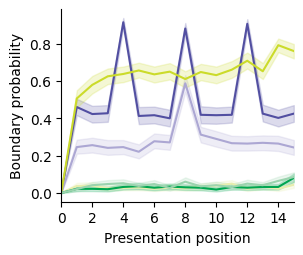

In [49]:
fig = plt.figure(figsize=(3, 2.5))

for cond in non_adaptive_exclude_random:
    df = boundaries[cond][cond].reset_index().melt(id_vars=['Subject', 'List'], var_name='Presentation position', value_name='Boundary probability')
    sns.lineplot(data=df, x='Presentation position', y='Boundary probability', color=colors[cond]);

ax = plt.gca()
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
plt.xlim([0, 15])
ax.set_xticks(range(0, 16, 2))

plt.savefig(os.path.join(figdir, 'boundary_probabilities.pdf'), bbox_inches='tight')

## Panel 1: as a function of *lag* to the boundary word on *early* lists, what's the probability of recall?

For example, do we see mini "primacy" and "recency" effects before/after boundaries?).  Create sub-panels for each condition (using only non-random non-adaptive conditions):
  - columns: condition
  - rows: event boundary dimension

Within each sub-panel, plot distance from the boundary (lag) on the $x$-axis and probability of recall on the $y$-axis.  Color each panel by its condition label.

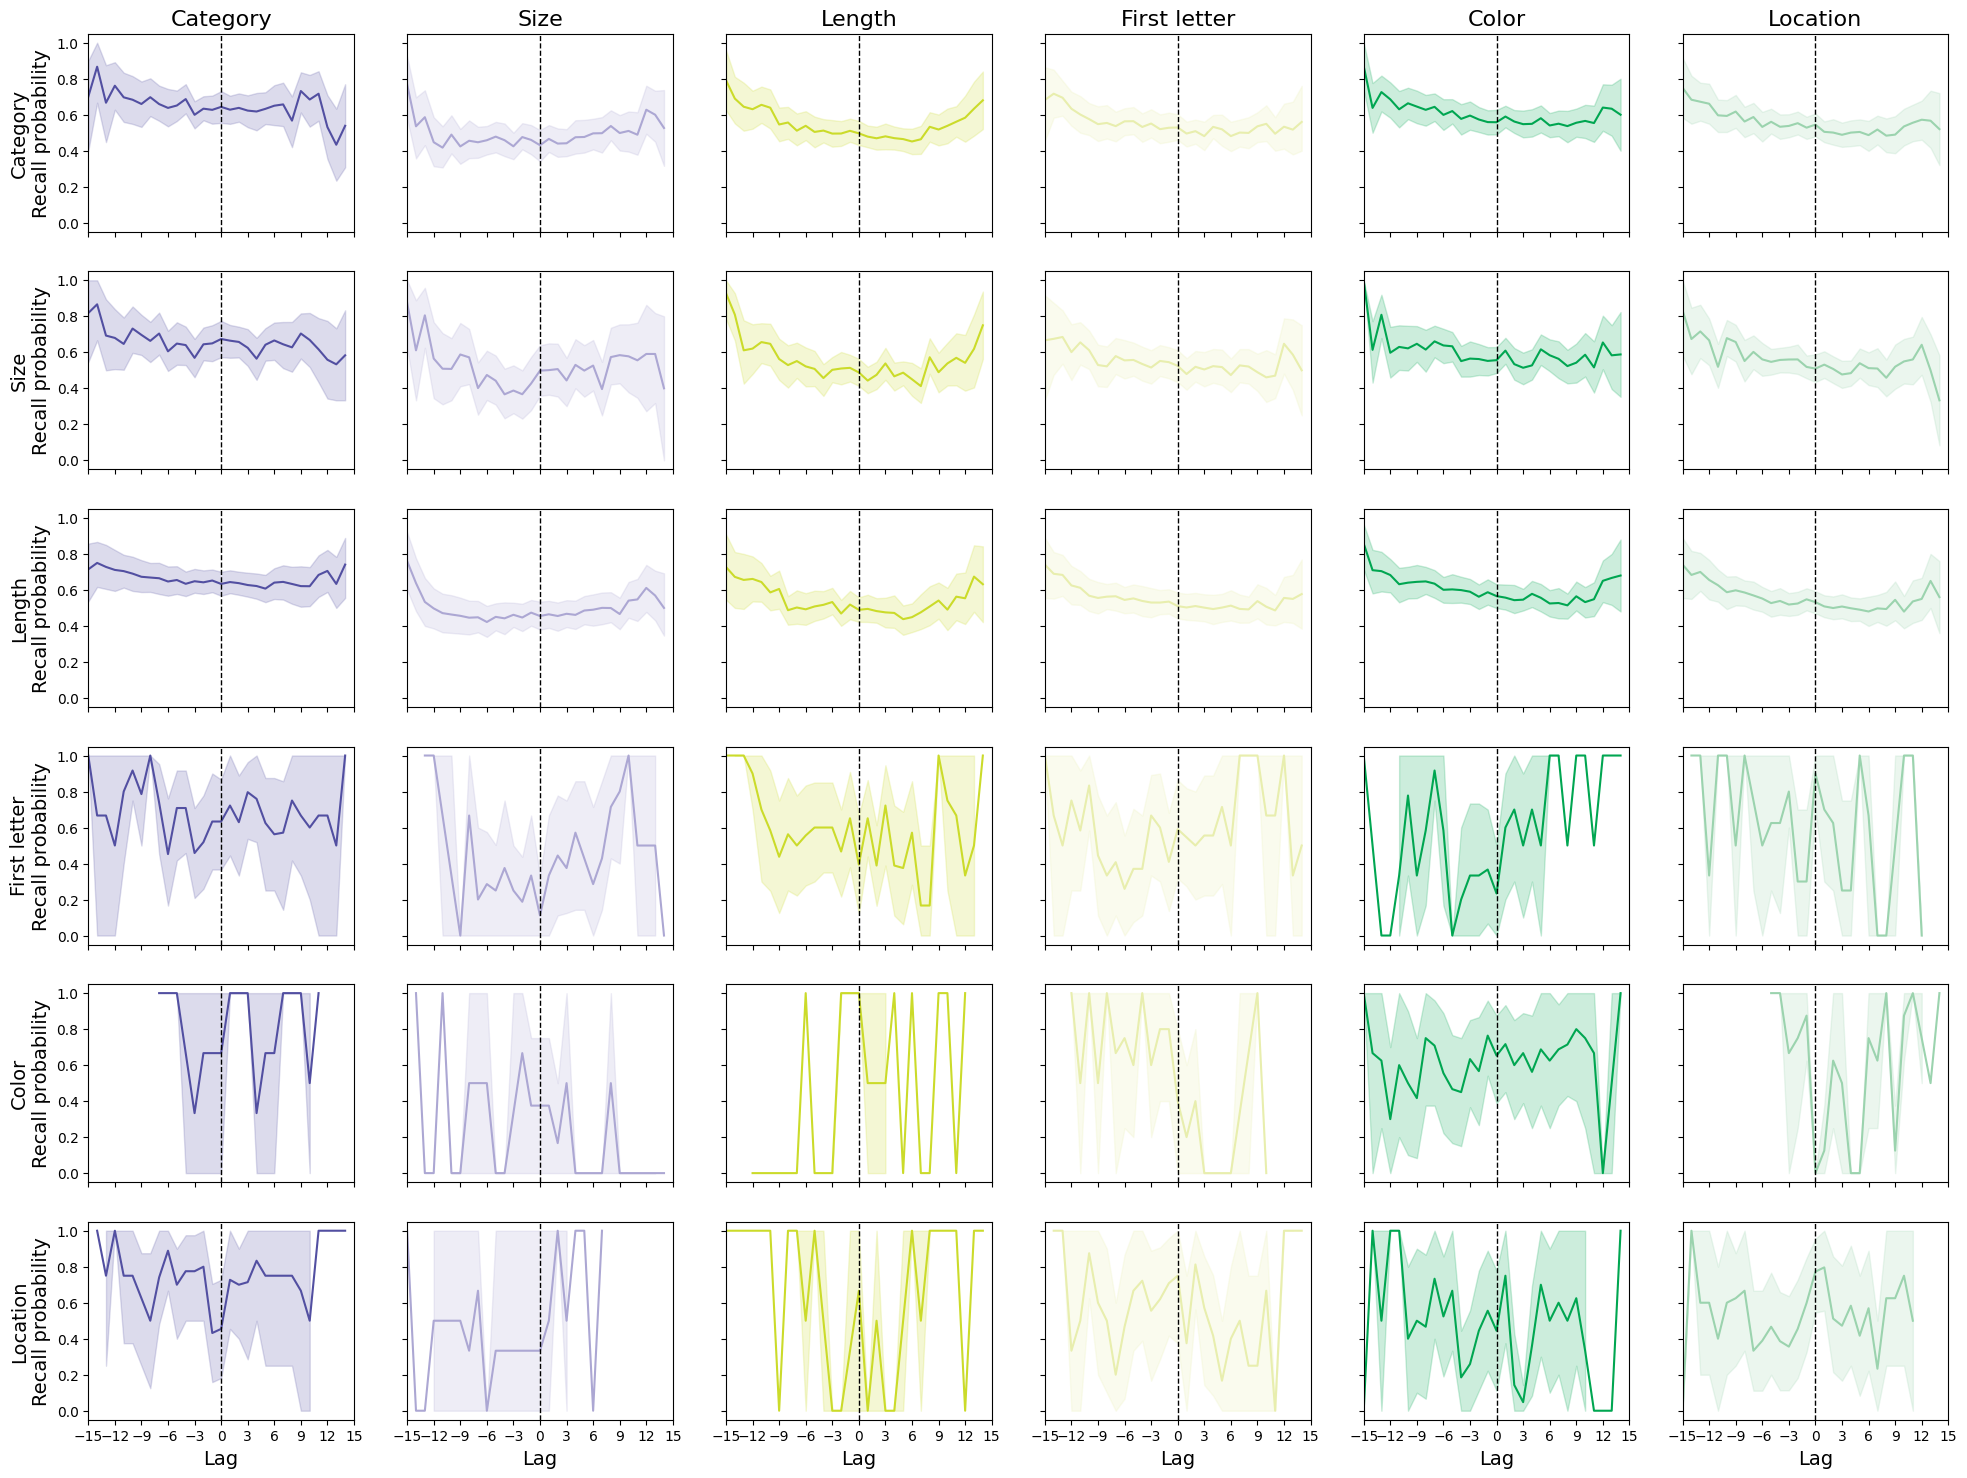

In [50]:
ylim = [-0.05, 1.05]
xlim = [-15, 15]

plot_accuracy_near_boundaries(accuracy_near_boundaries, 'Early', width=4, height=3, xlim=xlim, ylim=ylim, fname='accuracy_near_boundaries_early');

## Panel 2: as a function of *lag* to the boundary word on *late* lists, what's the probability of recall?

Same format as Panel 1, but for late lists...

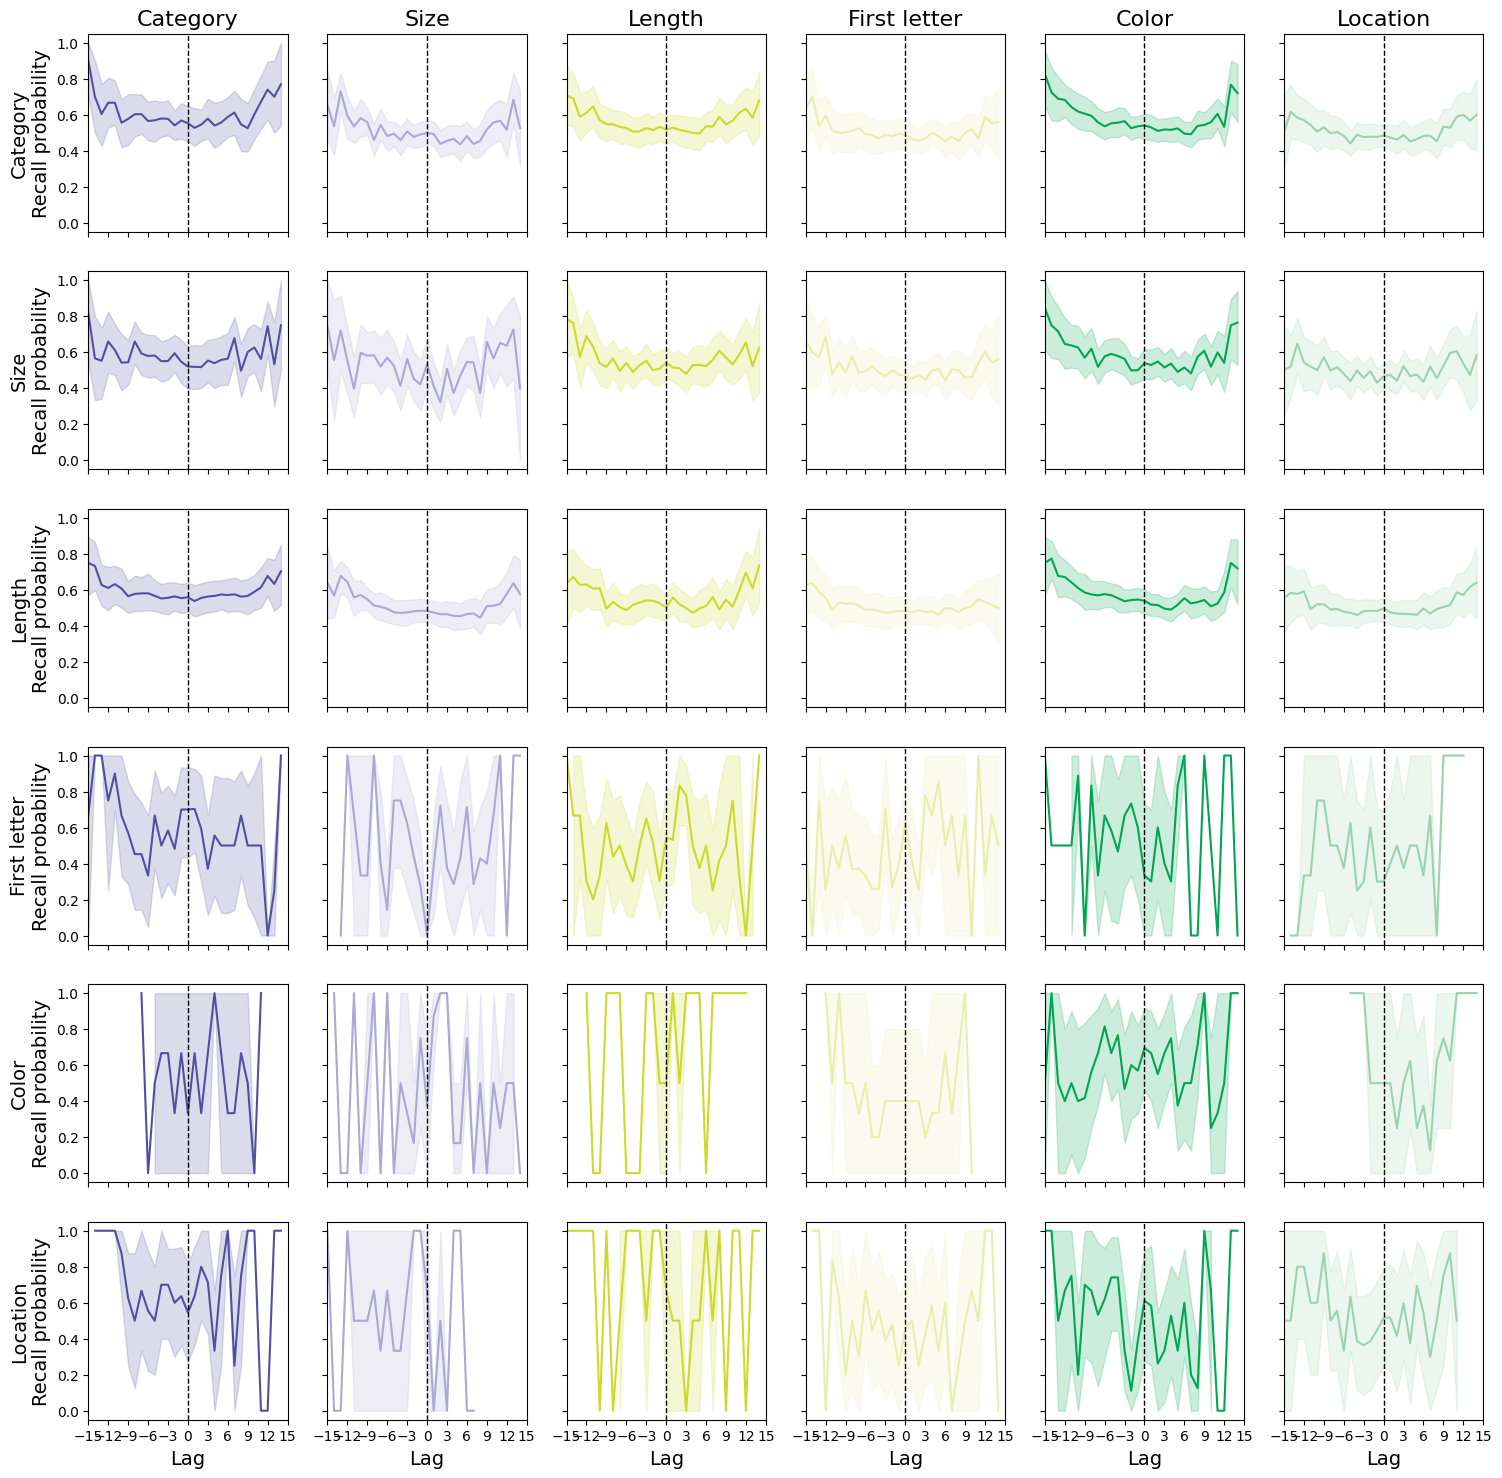

In [51]:
plot_accuracy_near_boundaries(accuracy_near_boundaries, 'Late', width=3, height=3, xlim=xlim, ylim=ylim, fname='accuracy_near_boundaries_late');

## Panel 3: recall probability as a function of number of boundaries

Plot as a set of sub-panels:
  - columns: condition
  - rows: event boundary dimension

This should be plotted as a density map:
  - one observation per list; $x$-coordinate: number of boundaries; $y$-coordinate: recall probability
  - include a regression line showing the overall trend

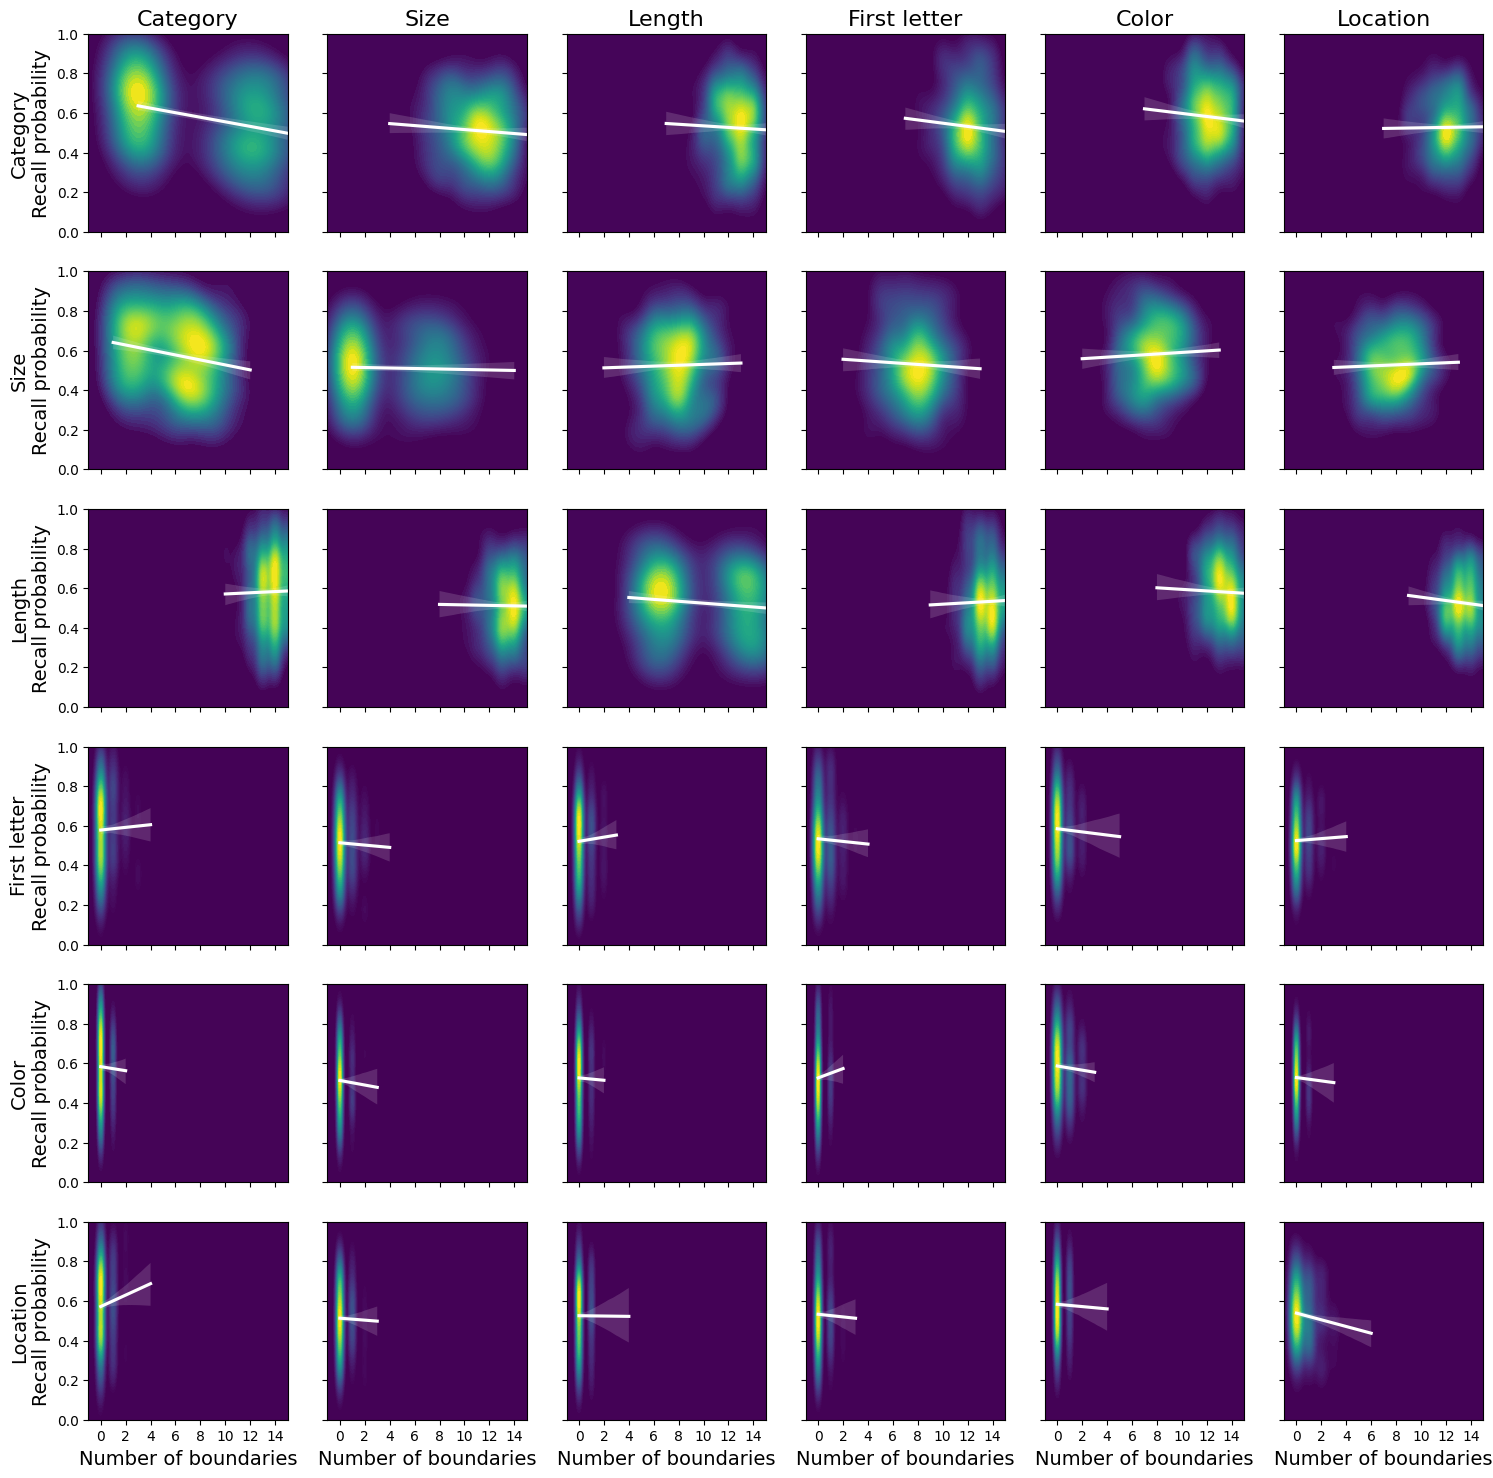

In [52]:
plot_boundary_density_maps(non_adaptive_exclude_random, boundaries, results_by_list['accuracy'], listgroups, ylabel='Recall probability', xlim=[-1, 15], ylim=[0, 1], cmap='viridis', fname='boundary_density_maps_accuracy');

## Panel 4: temporal clustering as a function of number of boundaries

Plot as a set of sub-panels:
  - columns: condition
  - rows: event boundary dimension

This should be plotted as a density map:
  - one observation per list; $x$-coordinate: number of boundaries; $y$-coordinate: temporal clustering score
  - include a regression line showing the overall trend

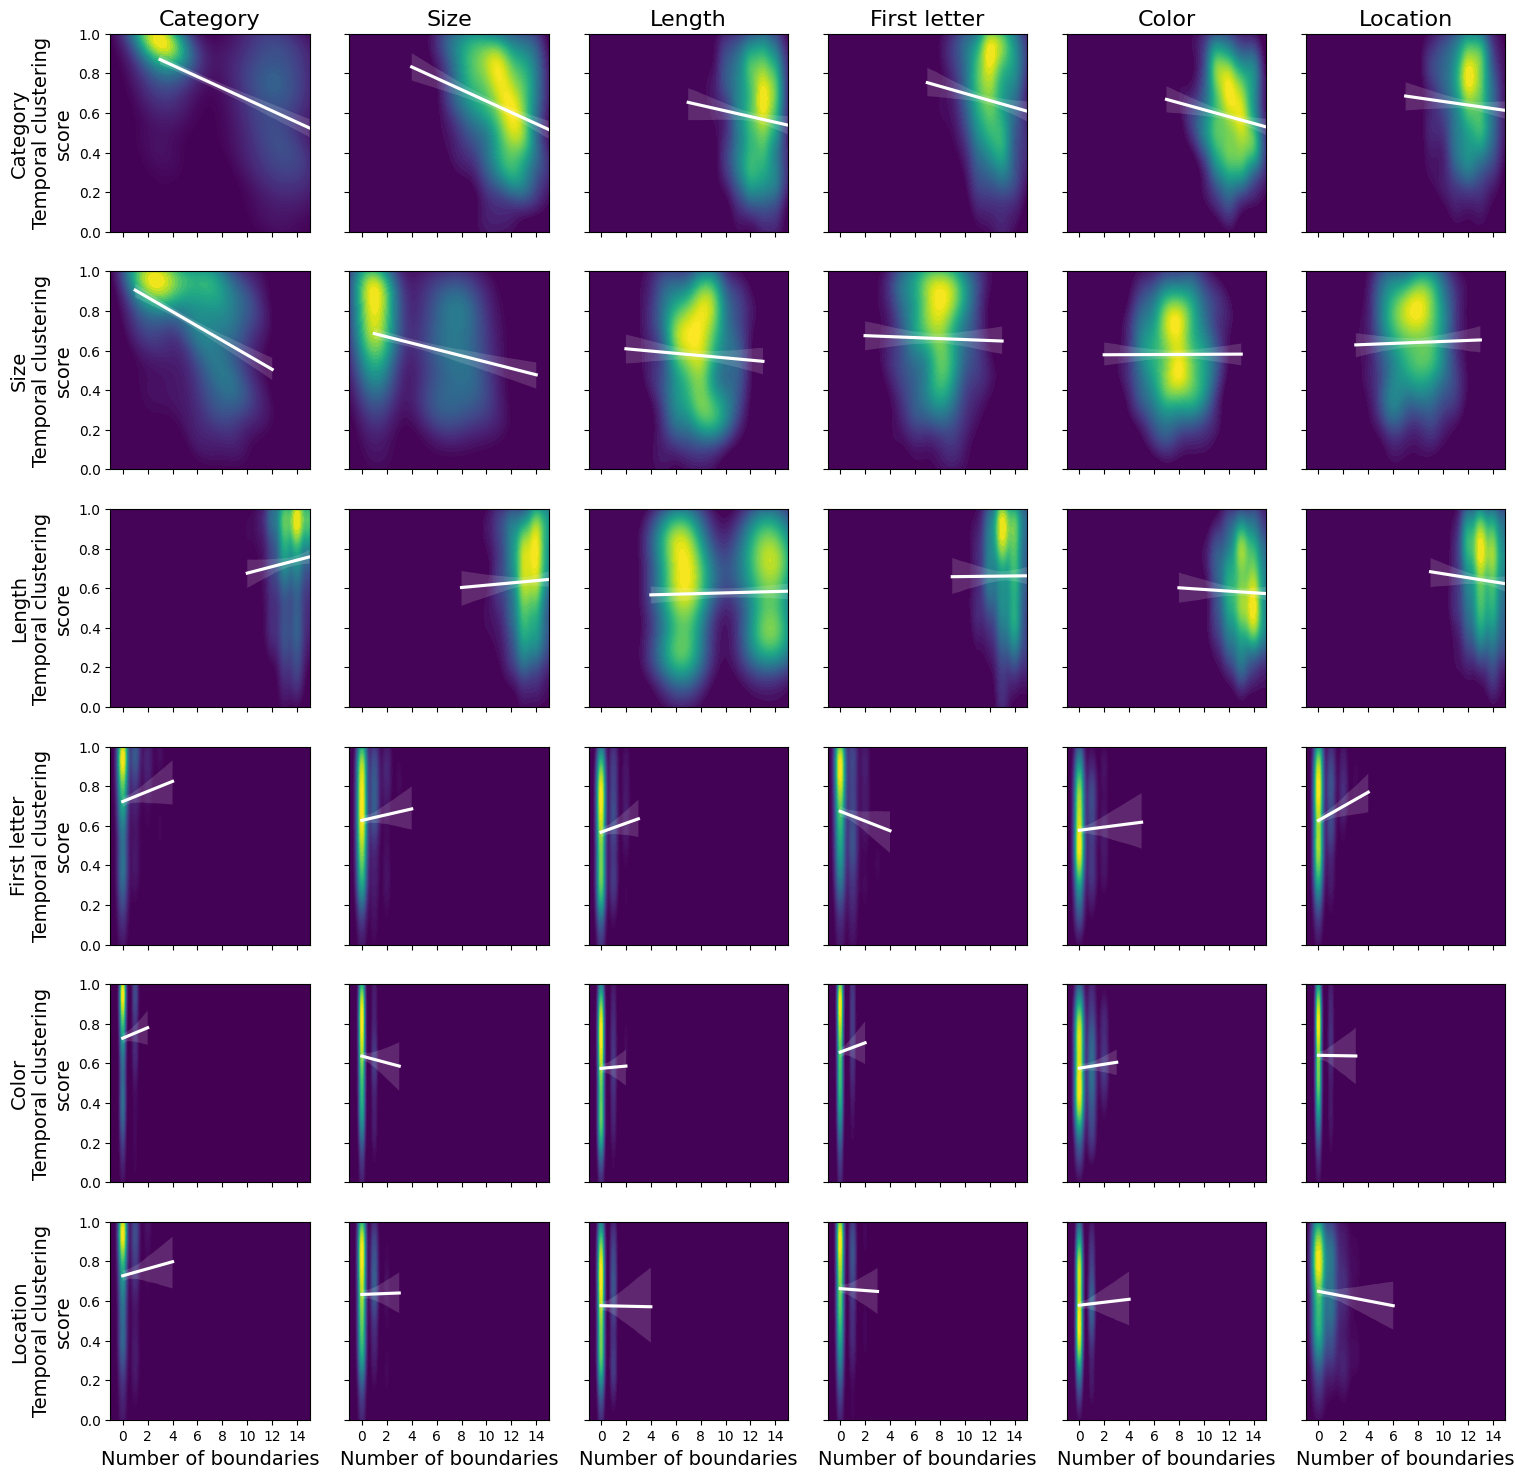

In [53]:
plot_boundary_density_maps(non_adaptive_exclude_random, boundaries, results_by_list['fingerprint'], listgroups, ylabel='Temporal clustering\nscore', behavioral_column='temporal', xlim=[-1, 15], ylim=[0, 1], cmap='viridis', fname='boundary_density_maps_temporal_clustering');

## Panel 5: feature clustering as a function of number of boundaries

Plot as a set of sub-panels:
  - columns: condition
  - rows: event boundary dimension AND feature used to compute clustering score

This should be plotted as a density map:
  - one observation per list; $x$-coordinate: number of boundaries; $y$-coordinate: clustering score for the given feature dimension
  - include a regression line showing the overall trend

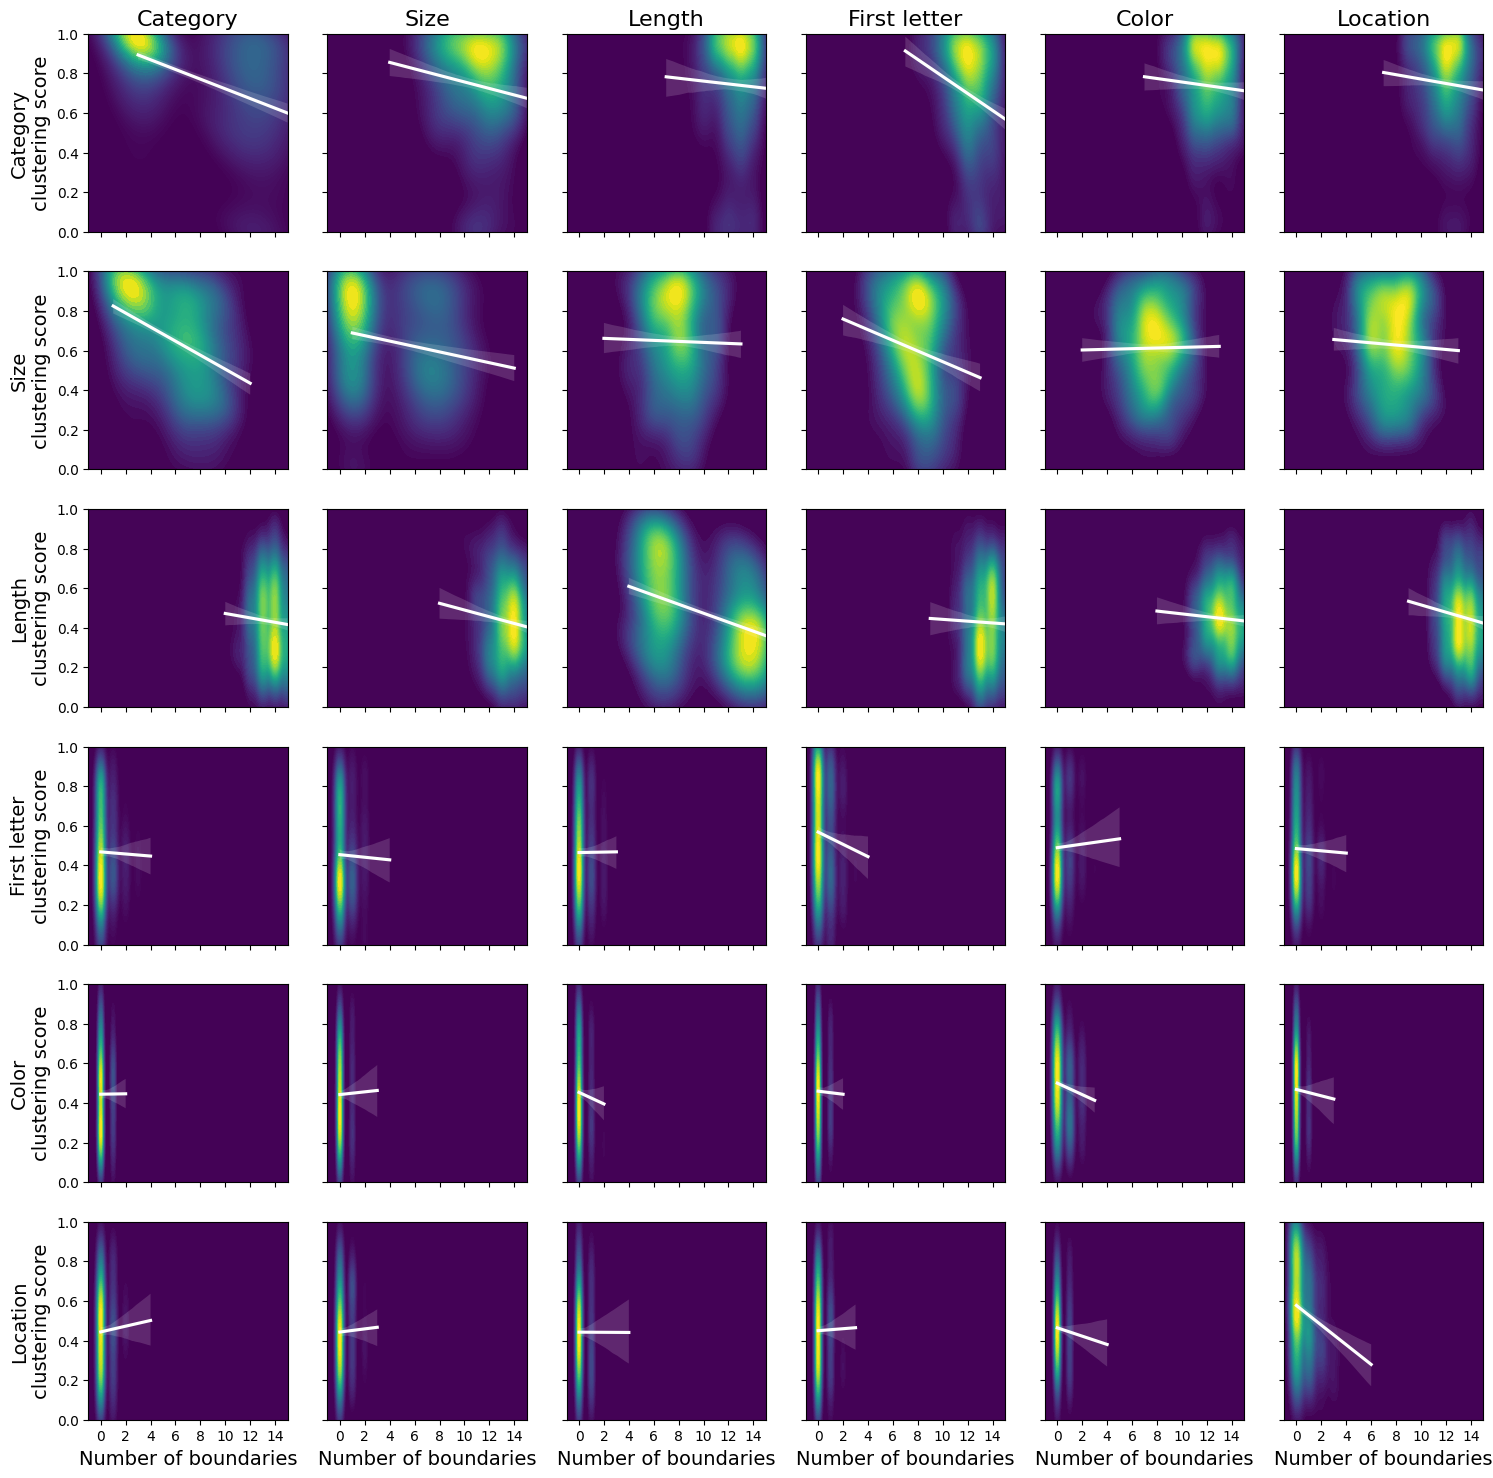

In [54]:
plot_boundary_density_maps(non_adaptive_exclude_random, boundaries, results_by_list['fingerprint'], listgroups, ylabel='clustering score', behavioral_column=non_adaptive_exclude_random, xlim=[-1, 15], ylim=[0, 1], cmap='viridis', fname='boundary_density_maps_feature_clustering');